<div style="display: flex; justify-content: center; align-items: center;">
<p align="center">
<img src="imagem.jpg" style="width:512px;height:438px">
</p>

<div style="margin-left: 20px;">
<h1 style="font-family: times new roman;">Torre de PROGRAMAção negra</h1>
<p style="margin-bottom: 1px;font-family: times new roman"> "Na Torre de PROGRAMAção Negra, onde dragões entrelaçam suas asas aos desígnios </p>
<p style="margin-bottom: 1px;font-family: times new roman"> dos deuses, os registros akáshicos se tecem em código dourado. Sob um céu estrelado, </p>
<p style="margin-bottom: 1px;font-family: times new roman">constelações de algoritmos se revelam, guiando mentes ousadas através do cosmos digital. </p>
<p style="margin-bottom: 1px;font-family: times new roman">Aqui, a magia negra da programação desvela os segredos ancestrais do conhecimento,</p>
<p style="margin-bottom: 1px;font-family: times new roman">unindo o místico e o tecnológico em uma dança celestial de sabedoria."</p>
<p style="margin-bottom: 5px;">ID Missão: Boss final </p>
<p style="margin-bottom: 5px;">INTEGRANTES: Eric Leandro Lima Mendonça (23014), Júlia Amancio Ferreira (23006) Vinícius André Oliveira Lima Moura (23011) e João Otávio de Ávila Nascimento (23022) </p>
<p style="margin-bottom: 5px;">DISCIPLINA: Aprendizado de Máquina</p>
<p style="margin-bottom: 5px;">PROFESSOR: Daniel Cassar</p>



</div>

# ***Dataset***

## **Sobre o dataset**


O dataset se refere a um banco de dados de exoplanetas catalogados pela nasa, tendo como colunas:

1. **Name**: O nome do exoplaneta ou uma designação única atribuída a ele para fins de identificação.

2. **Distance**: A distância estimada entre o sistema estelar que abriga o exoplaneta e a Terra. Isso pode ser expresso em unidades astronômicas (UA) ou outras unidades de medida.

3. **Stellar Magnitude**: A magnitude aparente da estrela hospedeira vista da Terra. A magnitude estelar é uma medida da luminosidade de uma estrela.

4. **Planet Type**: O tipo do exoplaneta, que pode incluir categorias como "Terrestre", "Gasoso" ou outros, dependendo das características do planeta.

5. **Discovery Year**: O ano em que o exoplaneta foi inicialmente descoberto ou identificado.

6. **Mass Multiplier**: Um multiplicador que indica a massa do exoplaneta em relação a uma unidade de medida de massa de referência (como a massa da Terra).

7. **Mass WRT**: A referência em relação à qual a massa do exoplaneta está sendo expressa (por exemplo, em relação à Terra).

8. **Radius Multiplier**: Um multiplicador que indica o raio do exoplaneta em relação a uma unidade de medida de raio de referência (como o raio da Terra).

9. **Radius WRT**: A referência em relação à qual o raio do exoplaneta está sendo expresso (por exemplo, em relação à Terra).

10. **Orbital Radius**: O raio orbital do exoplaneta, que é a distância média entre o exoplaneta e sua estrela hospedeira, frequentemente expresso em unidades astronômicas (UA).

11. **Orbital Period**: O período orbital do exoplaneta, que é o tempo que ele leva para completar uma órbita ao redor de sua estrela hospedeira, geralmente em dias terrestres.

12. **Eccentricity**: A excentricidade da órbita do exoplaneta, que descreve o quão elíptica (não circular) é a órbita. Varia de 0 (órbita circular) a 1 (órbita altamente elíptica).

13. **Detection Method**: O método pelo qual o exoplaneta foi detectado ou descoberto. Isso pode incluir métodos como "Trânsito" (observação de diminuições periódicas na luz da estrela quando o exoplaneta passa na frente dela) ou "Velocidade Radial" (medição das variações na velocidade radial da estrela causadas pela órbita do exoplaneta).

É importante ressaltar a importancia de desses tipos de dataset, pois as pesquisas relacionadas a exoplanetas desempenham um papel crucial na ampliação de nosso entendimento sobre o universo e na busca por vida além do nosso sistema solar. Ao detectar e caracterizar exoplanetas, cientistas conseguem explorar a diversidade planetária, compreender os processos de formação planetária e evolução de sistemas estelares. Essas investigações oferecem insights fundamentais sobre as condições necessárias para a existência de vida, examinando a habitabilidade de exoplanetas em zonas onde a água pode existir em estado líquido. Além disso, a pesquisa de exoplanetas contribui para o desenvolvimento de novas tecnologias de observação e instrumentação, impulsionando avanços na astronomia e astrofísica. 

# ***Código***

In [45]:
'''IMPORTS'''
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from kneed import KneeLocator
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import linkage, dendrogram
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import StratifiedKFold



In [2]:
'''FUNÇÕES'''

def gera_palpite_raio_vizinhanca(X, N):
    """Método para palpite do raio de vizinhança

    Args:
      X: conjunto de dados (atributos).
      N: número minimo de vizinhos do DBSCAN.

    Returns:
      Valor sugerido do raio da vizinhança.

    References:
      Código modificado de https://stackoverflow.com/a/71468901.
    """

    modelo = NearestNeighbors(n_neighbors=N + 1, metric='manhattan')
    modelo.fit(X)

    distancias, _ = modelo.kneighbors(X)
    distancias = np.sort(distancias, axis=0)
    distancias = distancias[:, N]

    cotovelo = KneeLocator(
        np.arange(len(distancias)),
        distancias,
        curve="convex",
        direction="increasing",
        interp_method="polynomial",
    )

    cotovelo.plot_knee()
    plt.xlabel("Quantidade de pontos")
    plt.ylabel("Distância")

    palpite_raio = distancias[cotovelo.knee]

    print(f"O palpite para o raio da vizinhança é {palpite_raio}")

    return palpite_raio

In [3]:
'''Importando o dataset'''

exoplanetas = pd.read_csv("Exoplanets.csv", sep=',') # Pega os dados do dataset 
df = pd.DataFrame(exoplanetas) #Transforma o dataset em um Dataframe pandas

df

name  distance  stellar_magnitude  planet_type  \
0     11 Comae Berenices b     304.0            4.72307    Gas Giant   
1       11 Ursae Minoris b     409.0            5.01300    Gas Giant   
2          14 Andromedae b     246.0            5.23133    Gas Giant   
3            14 Herculis b      58.0            6.61935    Gas Giant   
4             16 Cygni B b      69.0            6.21500    Gas Giant   
...                    ...       ...                ...          ...   
5245                XO-7 b     764.0           10.52100    Gas Giant   
5246              YSES 2 b     357.0           10.88500    Gas Giant   
5247             YZ Ceti b      12.0           12.07400  Terrestrial   
5248             YZ Ceti c      12.0           12.07400  Super Earth   
5249             YZ Ceti d      12.0           12.07400  Super Earth   

      discovery_year  mass_multiplier mass_wrt  radius_multiplier radius_wrt  \
0               2007         19.40000  Jupiter              1.080    Jupiter   
1               2009         14.74000  Jupiter              1.090    Jupiter   
2               2008          4.80000  Jupiter              1.150    Jupiter   
3               2002          8.13881  Jupiter              1.120    Jupiter   
4               1996          1.78000  Jupiter              1.200    Jupiter   
...              ...              ...      ...                ...        ...   
5245            2019          0.70900  Jupiter              1.373    Jupiter   
5246            2021          6.30000  Jupiter              1.140    Jupiter   
5247            2017          0.70000    Earth              0.913      Earth   
5248            2017          1.14000    Earth              1.050      Earth   
5249            2017          1.09000    Earth              1.030      Earth   

      orbital_radius  orbital_period  eccentricity detection_method  
0           1.290000        0.892539          0.23  Radial Velocity  
1           1.530000        1.400000          0.08  Radial Velocity  
2           0.830000        0.508693          0.00  Radial Velocity  
3           2.773069        4.800000          0.37  Radial Velocity  
4           1.660000        2.200000          0.68  Radial Velocity  
...              ...             ...           ...              ...  
5245        0.044210        0.007940          0.04          Transit  
5246      115.000000     1176.500000          0.00   Direct Imaging  
5247        0.016340        0.005476          0.06  Radial Velocity  
5248        0.021560        0.008487          0.00  Radial Velocity  
5249        0.028510        0.012868          0.07  Radial Velocity  

[5250 rows x 13 columns]

## **Tratamento dos dados**

In [4]:
'''Convertendo massa e raio'''

### MASSA ###

mass = [] # Cria uma lista vazia que receberá os novos valores de massa

for i in range(0, len(df['mass_wrt'])): # Irá percorrer toda a coluna do dataset referente 'mass_wrt' 
    if df['mass_wrt'][i] == 'Jupiter': # Confere se a relação da massa é com Jupiter ou não
        mass.append( 317.8 * df['mass_multiplier'][i]) # Se for igual a Jupiter sua massa será corrigida para ficar com o padrão terrestre e adiciona ao final da lista
    else:
        mass.append( df['mass_multiplier'][i]) # Se não for igual a Jupiter significa que já está em relação a terra e adiciona ao final da lista
        
df['mass'] = mass # Define uma nova coluna no dataset com referencia aos valores de massa corrijidos

df = df.drop(['mass_wrt', 'mass_multiplier'], axis=1) # Retira as colunas de massa que não serão mais relevantes

### RAIO ###

radius = [] # Cria uma lista vazia que receberá os novos valores de massa

for i in range(0, len(df['radius_wrt'])): # Irá percorrer toda a coluna do dataset referente 'radius_wrt' 
    
    if df['radius_wrt'][i] == 'Jupiter': # Confere se a relação do raio é com Jupiter ou não
        radius.append( 11.2 * df['radius_multiplier'][i]) # Se for igual a Jupiter seu raio será corrigida para ficar com o padrão terrestre e adiciona ao final da lista 
    else:
        radius.append( df['radius_multiplier'][i]) # Se não for igual a Jupiter significa que já está em relação a terra e adiciona ao final da lista
        
df['radius'] = radius # Define uma nova coluna no dataset com referencia aos valores do raio corrijidos

df = df.drop(['radius_wrt', 'radius_multiplier'], axis=1) # Retira as colunas de raio que não serão mais relevantes

df_sem_conversao = df # Esse data frame será usado para análise de dados

df # Mostrando nova tabela

name  distance  stellar_magnitude  planet_type  \
0     11 Comae Berenices b     304.0            4.72307    Gas Giant   
1       11 Ursae Minoris b     409.0            5.01300    Gas Giant   
2          14 Andromedae b     246.0            5.23133    Gas Giant   
3            14 Herculis b      58.0            6.61935    Gas Giant   
4             16 Cygni B b      69.0            6.21500    Gas Giant   
...                    ...       ...                ...          ...   
5245                XO-7 b     764.0           10.52100    Gas Giant   
5246              YSES 2 b     357.0           10.88500    Gas Giant   
5247             YZ Ceti b      12.0           12.07400  Terrestrial   
5248             YZ Ceti c      12.0           12.07400  Super Earth   
5249             YZ Ceti d      12.0           12.07400  Super Earth   

      discovery_year  orbital_radius  orbital_period  eccentricity  \
0               2007        1.290000        0.892539          0.23   
1               2009        1.530000        1.400000          0.08   
2               2008        0.830000        0.508693          0.00   
3               2002        2.773069        4.800000          0.37   
4               1996        1.660000        2.200000          0.68   
...              ...             ...             ...           ...   
5245            2019        0.044210        0.007940          0.04   
5246            2021      115.000000     1176.500000          0.00   
5247            2017        0.016340        0.005476          0.06   
5248            2017        0.021560        0.008487          0.00   
5249            2017        0.028510        0.012868          0.07   

     detection_method         mass   radius  
0     Radial Velocity  6165.320000  12.0960  
1     Radial Velocity  4684.372000  12.2080  
2     Radial Velocity  1525.440000  12.8800  
3     Radial Velocity  2586.513818  12.5440  
4     Radial Velocity   565.684000  13.4400  
...               ...          ...      ...  
5245          Transit   225.320200  15.3776  
5246   Direct Imaging  2002.140000  12.7680  
5247  Radial Velocity     0.700000   0.9130  
5248  Radial Velocity     1.140000   1.0500  
5249  Radial Velocity     1.090000   1.0300  

[5250 rows x 11 columns]

In [5]:
'''Convertendo os dados simbolicos númeriocos'''

# Criando uma instância para a feature categórica
encoder_detection_method = OneHotEncoder()

# Aplicando a transformação e transformado em colunas de 0 e 1 em formato de DataFrame
deteccao_encoded = encoder_detection_method.fit_transform(df[['detection_method']])
deteccao_novo = pd.DataFrame(deteccao_encoded.toarray(), columns=encoder_detection_method.get_feature_names_out(['detection_method']))

# Removendo a coluna categórica no dataframe antigo
df_dropado = df.drop(['detection_method'], axis=1)

# Juntando o dataframe antigo (dropado) com o novo dataframe de colunas numéricas
df_tratado = pd.concat([df_dropado, deteccao_novo], axis=1)

df_tratado # Mostrando nova tabela

name  distance  stellar_magnitude  planet_type  \
0     11 Comae Berenices b     304.0            4.72307    Gas Giant   
1       11 Ursae Minoris b     409.0            5.01300    Gas Giant   
2          14 Andromedae b     246.0            5.23133    Gas Giant   
3            14 Herculis b      58.0            6.61935    Gas Giant   
4             16 Cygni B b      69.0            6.21500    Gas Giant   
...                    ...       ...                ...          ...   
5245                XO-7 b     764.0           10.52100    Gas Giant   
5246              YSES 2 b     357.0           10.88500    Gas Giant   
5247             YZ Ceti b      12.0           12.07400  Terrestrial   
5248             YZ Ceti c      12.0           12.07400  Super Earth   
5249             YZ Ceti d      12.0           12.07400  Super Earth   

      discovery_year  orbital_radius  orbital_period  eccentricity  \
0               2007        1.290000        0.892539          0.23   
1               2009        1.530000        1.400000          0.08   
2               2008        0.830000        0.508693          0.00   
3               2002        2.773069        4.800000          0.37   
4               1996        1.660000        2.200000          0.68   
...              ...             ...             ...           ...   
5245            2019        0.044210        0.007940          0.04   
5246            2021      115.000000     1176.500000          0.00   
5247            2017        0.016340        0.005476          0.06   
5248            2017        0.021560        0.008487          0.00   
5249            2017        0.028510        0.012868          0.07   

             mass   radius  ...  detection_method_Direct Imaging  \
0     6165.320000  12.0960  ...                              0.0   
1     4684.372000  12.2080  ...                              0.0   
2     1525.440000  12.8800  ...                              0.0   
3     2586.513818  12.5440  ...                              0.0   
4      565.684000  13.4400  ...                              0.0   
...           ...      ...  ...                              ...   
5245   225.320200  15.3776  ...                              0.0   
5246  2002.140000  12.7680  ...                              1.0   
5247     0.700000   0.9130  ...                              0.0   
5248     1.140000   1.0500  ...                              0.0   
5249     1.090000   1.0300  ...                              0.0   

      detection_method_Disk Kinematics  \
0                                  0.0   
1                                  0.0   
2                                  0.0   
3                                  0.0   
4                                  0.0   
...                                ...   
5245                               0.0   
5246                               0.0   
5247                               0.0   
5248                               0.0   
5249                               0.0   

      detection_method_Eclipse Timing Variations  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   
...                                          ...   
5245                                         0.0   
5246                                         0.0   
5247                                         0.0   
5248                                         0.0   
5249                                         0.0   

      detection_method_Gravitational Microlensing  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   
...                                           ...  

In [6]:
'''Ajustes finais'''

# Retirando colunas desinteressantes
df_tratado = df_tratado.drop(['name', 'distance', 'discovery_year'], axis=1)

# Retirando valores nan
df_tratado = df_tratado.dropna()

# Ajustando o index
df_tratado = df_tratado.reset_index(drop=True)

df_tratado # Mostrando nova tabela


stellar_magnitude  planet_type  orbital_radius  orbital_period  \
0               4.72307    Gas Giant        1.290000        0.892539   
1               5.01300    Gas Giant        1.530000        1.400000   
2               5.23133    Gas Giant        0.830000        0.508693   
3               6.61935    Gas Giant        2.773069        4.800000   
4               6.21500    Gas Giant        1.660000        2.200000   
...                 ...          ...             ...             ...   
4772           10.52100    Gas Giant        0.044210        0.007940   
4773           10.88500    Gas Giant      115.000000     1176.500000   
4774           12.07400  Terrestrial        0.016340        0.005476   
4775           12.07400  Super Earth        0.021560        0.008487   
4776           12.07400  Super Earth        0.028510        0.012868   

      eccentricity         mass   radius  detection_method_Astrometry  \
0             0.23  6165.320000  12.0960                          0.0   
1             0.08  4684.372000  12.2080                          0.0   
2             0.00  1525.440000  12.8800                          0.0   
3             0.37  2586.513818  12.5440                          0.0   
4             0.68   565.684000  13.4400                          0.0   
...            ...          ...      ...                          ...   
4772          0.04   225.320200  15.3776                          0.0   
4773          0.00  2002.140000  12.7680                          0.0   
4774          0.06     0.700000   0.9130                          0.0   
4775          0.00     1.140000   1.0500                          0.0   
4776          0.07     1.090000   1.0300                          0.0   

      detection_method_Direct Imaging  detection_method_Disk Kinematics  \
0                                 0.0                               0.0   
1                                 0.0                               0.0   
2                                 0.0                               0.0   
3                                 0.0                               0.0   
4                                 0.0                               0.0   
...                               ...                               ...   
4772                              0.0                               0.0   
4773                              1.0                               0.0   
4774                              0.0                               0.0   
4775                              0.0                               0.0   
4776                              0.0                               0.0   

      detection_method_Eclipse Timing Variations  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   
...                                          ...   
4772                                         0.0   
4773                                         0.0   
4774                                         0.0   
4775                                         0.0   
4776                                         0.0   

      detection_method_Gravitational Microlensing  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   
...                                           ...   
4772                                          0.0   
4773                                          0.0   
4774                                          0.0   
4775                                          0.0   
4776                                          0.0   

      detection_method_Orbital Brightness Modulation  \
0                                            

## **Análise dos dados**

In [7]:
'''Ajustando os dados sem conversão'''

df_2 = df_sem_conversao

# Retirando colunas desinteressantes
df_2 = df_2.drop(['name', 'distance', 'discovery_year'], axis=1)

# Retirando valores nan
df_2 = df_2.dropna()

# Ajustando o index
df_2 = df_2.reset_index(drop=True)

df_2 # Mostrando nova tabela
df_2

stellar_magnitude  planet_type  orbital_radius  orbital_period  \
0               4.72307    Gas Giant        1.290000        0.892539   
1               5.01300    Gas Giant        1.530000        1.400000   
2               5.23133    Gas Giant        0.830000        0.508693   
3               6.61935    Gas Giant        2.773069        4.800000   
4               6.21500    Gas Giant        1.660000        2.200000   
...                 ...          ...             ...             ...   
4772           10.52100    Gas Giant        0.044210        0.007940   
4773           10.88500    Gas Giant      115.000000     1176.500000   
4774           12.07400  Terrestrial        0.016340        0.005476   
4775           12.07400  Super Earth        0.021560        0.008487   
4776           12.07400  Super Earth        0.028510        0.012868   

      eccentricity detection_method         mass   radius  
0             0.23  Radial Velocity  6165.320000  12.0960  
1             0.08  Radial Velocity  4684.372000  12.2080  
2             0.00  Radial Velocity  1525.440000  12.8800  
3             0.37  Radial Velocity  2586.513818  12.5440  
4             0.68  Radial Velocity   565.684000  13.4400  
...            ...              ...          ...      ...  
4772          0.04          Transit   225.320200  15.3776  
4773          0.00   Direct Imaging  2002.140000  12.7680  
4774          0.06  Radial Velocity     0.700000   0.9130  
4775          0.00  Radial Velocity     1.140000   1.0500  
4776          0.07  Radial Velocity     1.090000   1.0300  

[4777 rows x 8 columns]

### Comparação Massa x Raio

A importancia de comparar a massa e o raio em conjuntos de dados de exoplanetas é vital para desvendar a diversidade desses planetas e inferir suas propriedades internas. A relação entre esses dois parâmetros é crucial para calcular a densidade dos exoplanetas, fornecendo insights sobre sua composição - se são predominantemente rochosos, gasosos ou uma combinação de ambos. Essa comparação auxilia na categorização dos exoplanetas em tipos distintos, como super-Terras, gigantes gasosos ou planetas tipo Netuno, cada um exibindo características específicas nessa relação. Além disso, a análise da relação entre massa e raio contribui para o entendimento dos processos de formação e evolução dos exoplanetas, refinando modelos teóricos. Nosso objetivo com essa comparação era verificar se mantinha uma relação entre a massa e o raio, e qual seria essa. Uma relação linear poderia ser esperada, mas não foi o caso.

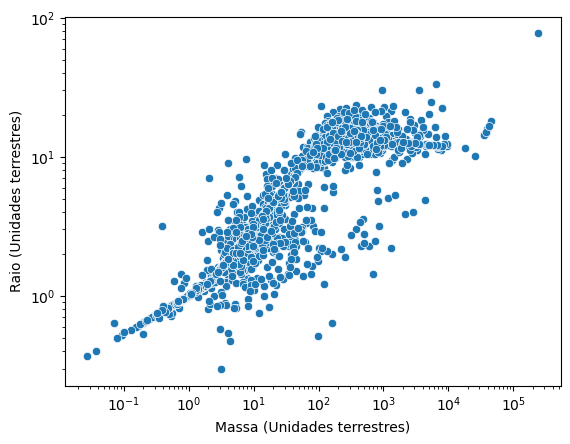

In [8]:
'''Gráfico massa x raio'''

sns.scatterplot(data=df_2, x='mass', y='radius')
plt.xlabel("Massa (Unidades terrestres)")
plt.ylabel("Raio (Unidades terrestres)")
plt.xscale('log')
plt.yscale('log')
plt.show()

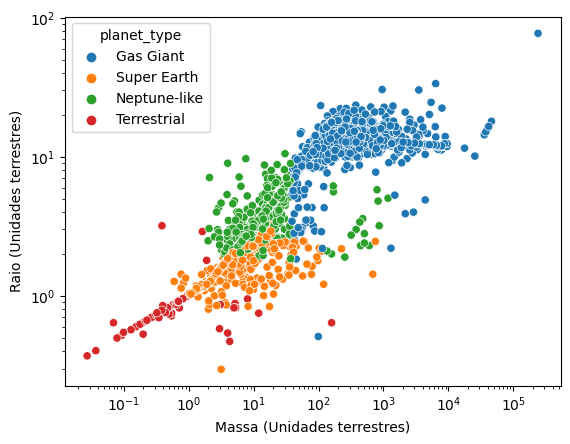

In [9]:
'''Gráfico massa x raio, destacando os tipos de planetas'''

sns.scatterplot(data=df_2, x='mass', y='radius', hue='planet_type')
plt.xlabel("Massa (Unidades terrestres)")
plt.ylabel("Raio (Unidades terrestres)")
plt.xscale('log')
plt.yscale('log')
plt.show()

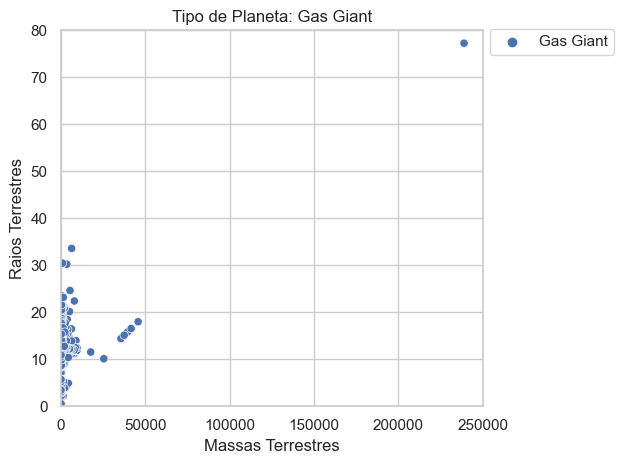

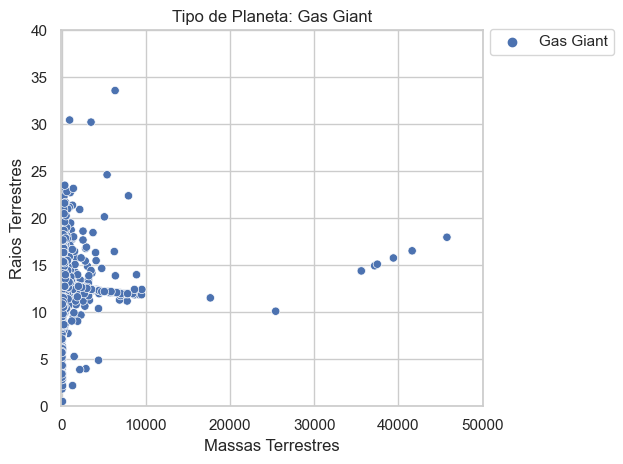

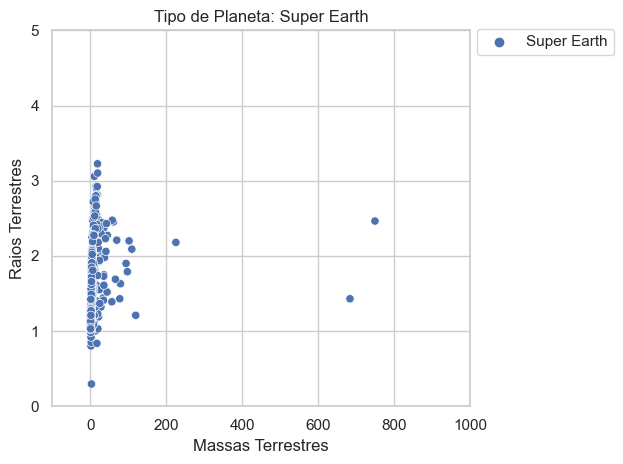

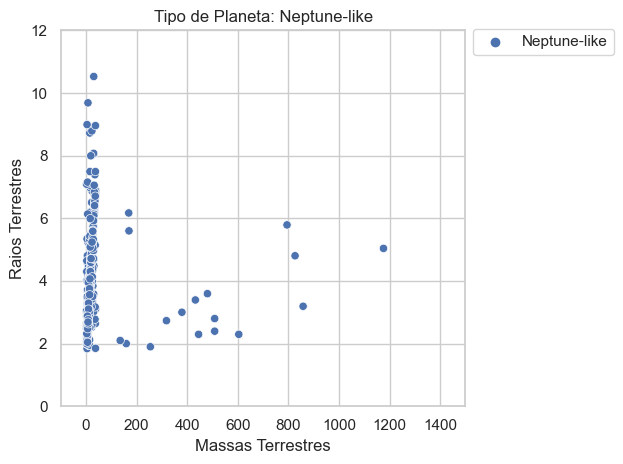

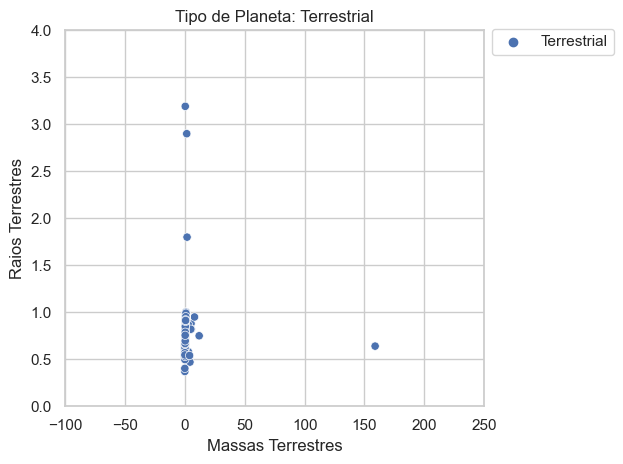

In [10]:
# Tipos de planetas desejados.
# Os intervalos foram definidos depois de testes de visualizaçõa para saber os intervalos que não perderiam os valores e seriam melhores para visualização.
# O Gas Giant com intervalo menor foi para visualização conjunta sem um único dado que aparece isolado.
tipos_planetas = ['Gas Giant', 'Gas Giant', 'Super Earth', 'Neptune-like', 'Terrestrial']
intervalos_x = [250000, 50000, 1000, 1500, 250]
intervalos_y = [80, 40, 5, 12, 4]
               
# Definindo o estilo dos plots
sns.set(style="whitegrid")

# Criando os gráficos para cada tipo de planeta
for tipo, intervalo_x, intervalo_y in zip(tipos_planetas, intervalos_x, intervalos_y):
    # Filtrando o data frame para incluir somente os dados do tipo de planeta atual no loop
    df_atual = df_2[df_2['planet_type'] == tipo]

    # Criando o gráfico scatter plot para o tipo de planeta atual
    grafico = sns.scatterplot(data=df_atual, x='mass', y='radius', hue='planet_type')

    # Personalizando o gráfico para a área específica desejada
    grafico.set(ylim=(0, intervalo_y), xlim=(-100, intervalo_x))  # Define o zoom nos eixos x e y
    
    # Mostrando o gráfico
    grafico.set_xlabel('Massas Terrestres')
    grafico.set_ylabel('Raios Terrestres')
    grafico.set_title(f'Tipo de Planeta: {tipo}')
    grafico.legend(loc='center left', bbox_to_anchor=(1, 0.97))
    grafico.figure.tight_layout()

    # Exibindo o gráfico
    plt.show()

In [11]:
# Tipos de planetas desejados
tipos_planetas = ['Gas Giant', 'Gas Giant', 'Super Earth', 'Neptune-like', 'Terrestrial']
cores = ['blue', 'red', 'green', 'orange', 'purple']  # Definindo as cores para cada tipo de planeta

# Preparando os dados
df_bokeh = pd.DataFrame(columns=['mass', 'radius', 'planet_type'])
for tipo in tipos_planetas:
    df_atual = df_2[df_2['planet_type'] == tipo]
    df_bokeh = pd.concat([df_bokeh, df_atual])

output_notebook()

# Criando o gráfico Bokeh
p = figure(title='Tipos de Planetas', x_axis_label='Massas Terrestres', y_axis_label='Raios Terrestres')

for tipo, cor in zip(tipos_planetas, cores):
    df_tipo_atual = df_bokeh[df_bokeh['planet_type'] == tipo]
    p.circle(x='mass', y='radius', legend_label=tipo, source=df_tipo_atual, size=10, color=cor)  # Definindo a cor

p.legend.location = "top_left"
p.legend.click_policy = "hide"

output_notebook()
show(p)

Loading BokehJS ...

Loading BokehJS ...

### Comparação Raio Orbital x Período Orbital

A importancia de comparar o período orbital e o raio orbital em conjuntos de dados de exoplanetas desempenha um papel vital na exploração das dinâmicas complexas desses sistemas planetários. O período orbital, que representa o tempo que um exoplaneta leva para completar uma volta ao redor de sua estrela hospedeira, está intimamente ligado ao raio orbital, que é a distância média entre o exoplaneta e sua estrela. Esta comparação é crucial para entender a dinâmica orbital do sistema, revelando se o exoplaneta orbita em uma trajetória elíptica, circular ou em ressonância com outros corpos no sistema. Além disso,a relação entre período e raio orbital também é crucial para avaliar a estabilidade orbital do sistema ao longo do tempo, influenciando a seleção de alvos para estudos mais aprofundados. O objetivo dessa análise era verificar igualmente se haveria uma relação entre os dados, se caso o raio do Orbital fosse maior, se o período aumentaria em uma certa proporção. Pelo gráfico podemos afirmar que aumenta como o imaginado.

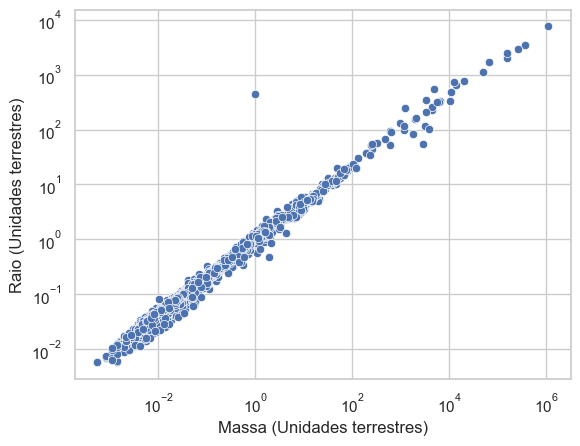

In [12]:
'''Gráfico Raio Orbital X Período Orbital'''

sns.scatterplot(data=df_2, x='orbital_period', y='orbital_radius')
plt.xlabel("Massa (Unidades terrestres)")
plt.ylabel("Raio (Unidades terrestres)")
plt.xscale('log')
plt.yscale('log')
plt.show()

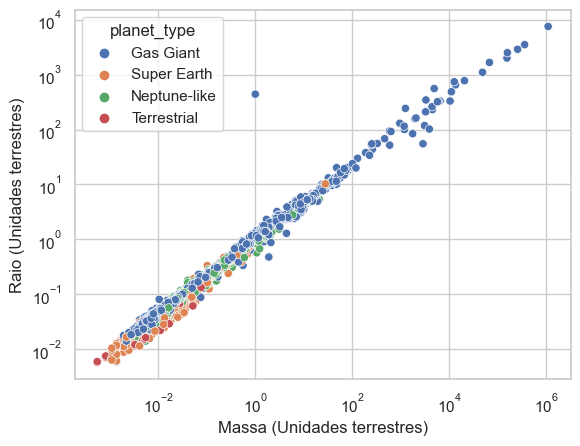

In [13]:
'''Gráfico Raio Orbital X Período Orbital, destacando os tipo de planetas'''

sns.scatterplot(data=df_2, x='orbital_period', y='orbital_radius', hue='planet_type')
plt.xlabel("Massa (Unidades terrestres)")
plt.ylabel("Raio (Unidades terrestres)")
plt.xscale('log')
plt.yscale('log')
plt.show()

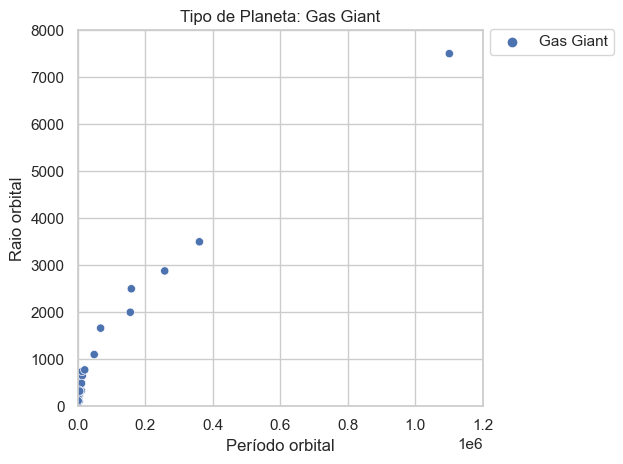

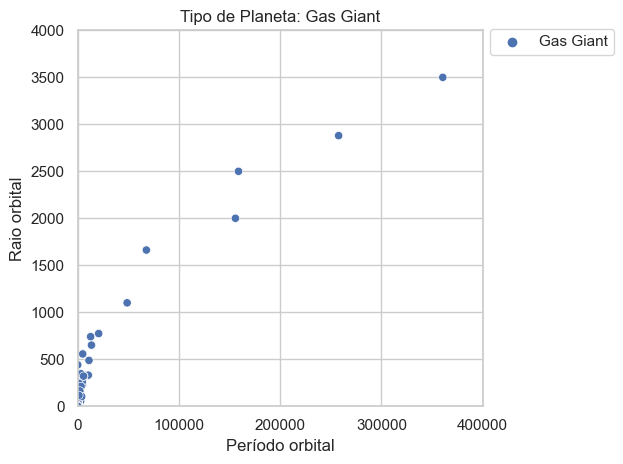

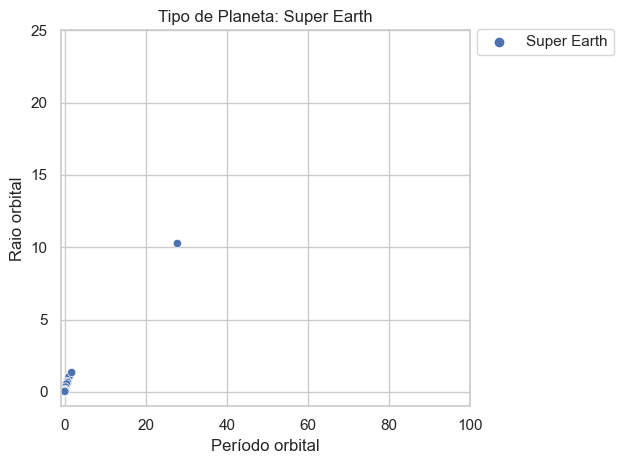

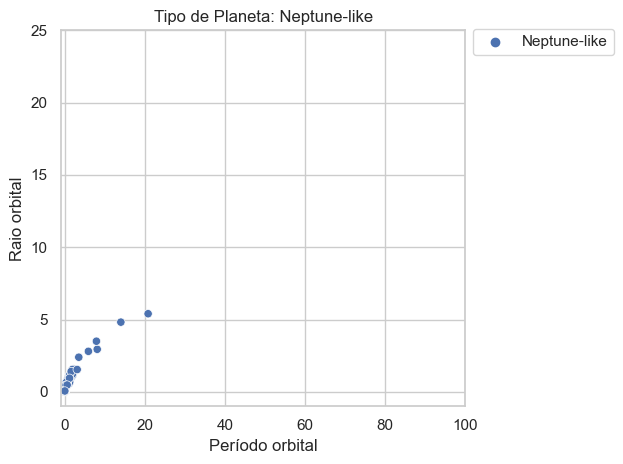

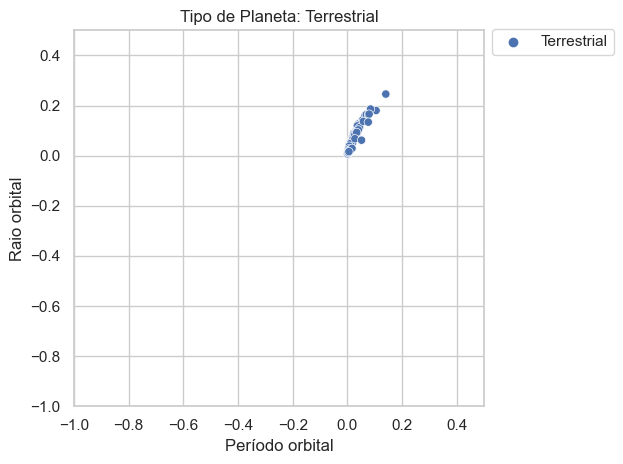

In [14]:
# Tipos de planetas desejados.
# Os intervalos foram definidos depois de testes de visualizaçõa para saber os intervalos que não perderiam os valores e seriam melhores para visualização.
# O Gas Giant com intervalo menor foi para visualização conjunta sem um único dado que aparece isolado.
tipos_planetas = ['Gas Giant', 'Gas Giant', 'Super Earth', 'Neptune-like', 'Terrestrial']
intervalos_x = [1.2e6, 0.4e6, 100, 100, 0.5]
intervalos_y = [8000, 4000, 25, 25, 0.5]
               
# Definindo o estilo dos plots
sns.set(style="whitegrid")

# Criando os gráficos para cada tipo de planeta
for tipo, intervalo_x, intervalo_y in zip(tipos_planetas, intervalos_x, intervalos_y):
    # Filtrando o data frame para incluir somente os dados do tipo de planeta atual no loop
    df_atual = df_2[df_2['planet_type'] == tipo]

    # Criando o gráfico scatter plot para o tipo de planeta atual
    grafico = sns.scatterplot(data=df_atual, x='orbital_period', y='orbital_radius', hue='planet_type')

    # Personalizando o gráfico para a área específica desejada
    grafico.set(ylim=(-1, intervalo_y), xlim=(-1, intervalo_x))  # Define o zoom nos eixos x e y
    
    # Mostrando o gráfico
    grafico.set_xlabel('Período orbital')
    grafico.set_ylabel('Raio orbital')
    grafico.set_title(f'Tipo de Planeta: {tipo}')
    grafico.legend(loc='center left', bbox_to_anchor=(1, 0.97))
    grafico.figure.tight_layout()

    # Exibindo o gráfico
    plt.show()

In [15]:
# Tipos de planetas desejados
tipos_planetas = ['Gas Giant', 'Gas Giant', 'Super Earth', 'Neptune-like', 'Terrestrial']
cores = ['blue', 'red', 'green', 'orange', 'purple']  # Definindo as cores para cada tipo de planeta

# Preparando os dados
df_bokeh = pd.DataFrame(columns=['orbital_period', 'orbital_radius', 'planet_type'])
for tipo in tipos_planetas:
    df_atual = df_2[df_2['planet_type'] == tipo]
    df_bokeh = pd.concat([df_bokeh, df_atual])

output_notebook()

# Criando o gráfico Bokeh
p = figure(title='Tipos de Planetas', x_axis_label='Período Orbital', y_axis_label='Raio orbital')

for tipo, cor in zip(tipos_planetas, cores):
    df_tipo_atual = df_bokeh[df_bokeh['planet_type'] == tipo]
    p.circle(x='orbital_period', y='orbital_radius', legend_label=tipo, source=df_tipo_atual, size=10, color=cor)  # Definindo a cor

p.legend.location = "top_left"
p.legend.click_policy = "hide"

show(p)

Loading BokehJS ...

### Comparação entre Raio Orbital x Período Orbital x Excentricidade

A importancia de comparar o período orbital, raio orbital e excentricidade em um conjunto de dados de exoplanetas é essencial para obter uma visão abrangente das características orbitais desses sistemas distantes. O período orbital, que representa o tempo de uma órbita completa ao redor da estrela, e o raio orbital, a distância média entre o exoplaneta e sua estrela, oferecem detalhes cruciais sobre o tamanho e a posição do sistema, como já dito anteriormente. A excentricidade da órbita, que descreve a sua forma, adiciona outra dimensão importante a essa análise. Comparar esses parâmetros permite a identificação de padrões sistemáticos em diferentes sistemas planetários, indicando possíveis influências de migração planetária ou interações gravitacionais passadas. Essa comparação também desempenha um papel crucial na categorização de exoplanetas, especialmente em relação a suas zonas habitáveis.

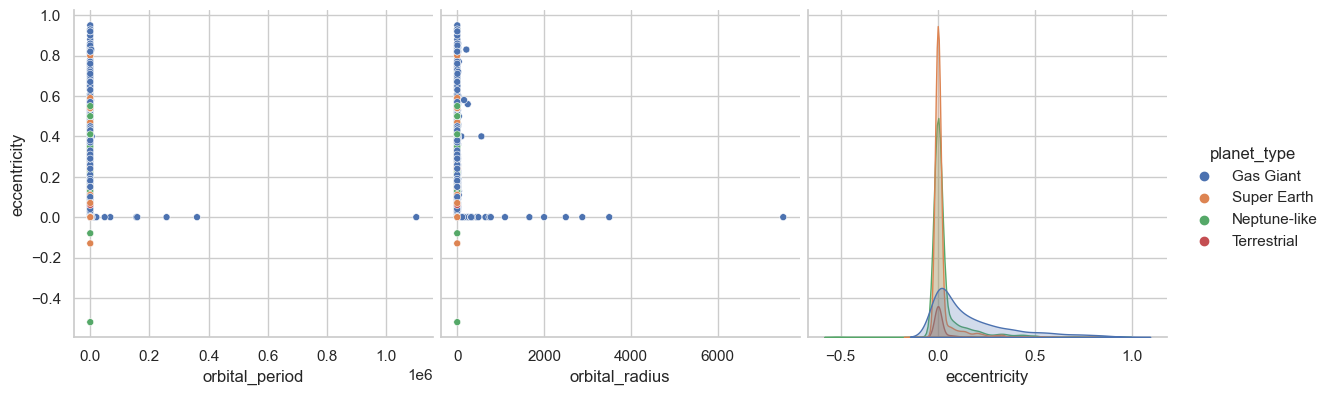

In [16]:
sns.pairplot(data=df_2,
            y_vars = ['eccentricity'],
            x_vars = ['orbital_period', 'orbital_radius', 'eccentricity'],
            kind='scatter',
            hue='planet_type',
            height=4,
            aspect=1,
            plot_kws={'s': 25})
plt.show()

In [17]:
# Tipos de planetas desejados
tipos_planetas = ['Gas Giant', 'Gas Giant', 'Super Earth', 'Neptune-like', 'Terrestrial']
cores = ['blue', 'red', 'green', 'orange', 'purple']  # Definindo as cores para cada tipo de planeta

# Preparando os dados
df_bokeh = pd.DataFrame(columns=['orbital_period', 'eccentricity', 'planet_type'])
for tipo in tipos_planetas:
    df_atual = df_2[df_2['planet_type'] == tipo]
    df_bokeh = pd.concat([df_bokeh, df_atual])

output_notebook()

# Criando o gráfico Bokeh
p = figure(title='Tipos de Planetas', x_axis_label='Período Orbital', y_axis_label='Excentricidade')

for tipo, cor in zip(tipos_planetas, cores):
    df_tipo_atual = df_bokeh[df_bokeh['planet_type'] == tipo]
    p.circle(x='orbital_period', y='eccentricity', legend_label=tipo, source=df_tipo_atual, size=10, color=cor)  # Definindo a cor

p.legend.location = "top_right"
p.legend.click_policy = "hide"

show(p)

Loading BokehJS ...

In [18]:
# Tipos de planetas desejados
tipos_planetas = ['Gas Giant', 'Gas Giant', 'Super Earth', 'Neptune-like', 'Terrestrial']
cores = ['blue', 'red', 'green', 'orange', 'purple']  # Definindo as cores para cada tipo de planeta

# Preparando os dados
df_bokeh = pd.DataFrame(columns=['orbital_radius', 'eccentricity', 'planet_type'])
for tipo in tipos_planetas:
    df_atual = df_2[df_2['planet_type'] == tipo]
    df_bokeh = pd.concat([df_bokeh, df_atual])

output_notebook()

# Criando o gráfico Bokeh
p = figure(title='Tipos de Planetas', x_axis_label='Raio Orbital', y_axis_label='Excentricidade')

for tipo, cor in zip(tipos_planetas, cores):
    df_tipo_atual = df_bokeh[df_bokeh['planet_type'] == tipo]
    p.circle(x='orbital_radius', y='eccentricity', legend_label=tipo, source=df_tipo_atual, size=10, color=cor)  # Definindo a cor

p.legend.location = "top_right"
p.legend.click_policy = "hide"

show(p)

Loading BokehJS ...

### Gráfico de correlação

In [19]:
dados_numericos = df_2.reindex(['stellar_magnitude', 'mass', 'radius', 'orbital_radius', 'orbital_period', 'eccentricity'], axis=1)
dados_numericos

stellar_magnitude         mass   radius  orbital_radius  orbital_period  \
0               4.72307  6165.320000  12.0960        1.290000        0.892539   
1               5.01300  4684.372000  12.2080        1.530000        1.400000   
2               5.23133  1525.440000  12.8800        0.830000        0.508693   
3               6.61935  2586.513818  12.5440        2.773069        4.800000   
4               6.21500   565.684000  13.4400        1.660000        2.200000   
...                 ...          ...      ...             ...             ...   
4772           10.52100   225.320200  15.3776        0.044210        0.007940   
4773           10.88500  2002.140000  12.7680      115.000000     1176.500000   
4774           12.07400     0.700000   0.9130        0.016340        0.005476   
4775           12.07400     1.140000   1.0500        0.021560        0.008487   
4776           12.07400     1.090000   1.0300        0.028510        0.012868   

      eccentricity  
0             0.23  
1             0.08  
2             0.00  
3             0.37  
4             0.68  
...            ...  
4772          0.04  
4773          0.00  
4774          0.06  
4775          0.00  
4776          0.07  

[4777 rows x 6 columns]

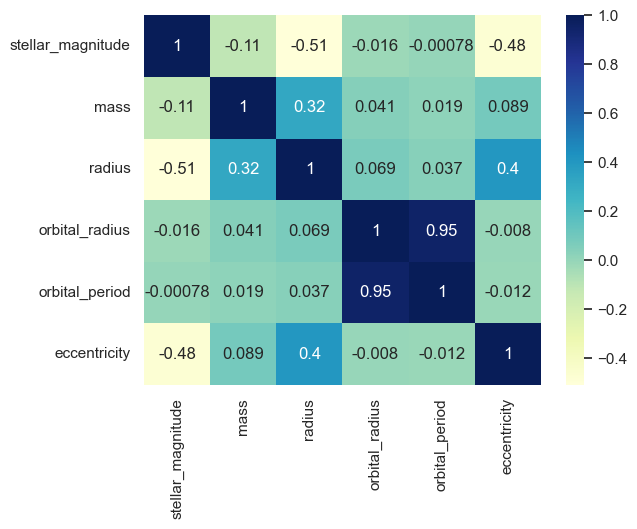

In [20]:
correlacao_numerica = sns.heatmap(dados_numericos.corr(), cmap="YlGnBu", annot=True)

O mapa acima mostra uma análise de correlação. Nesse mapa é perceptível que muitos dados não possuem correlação, uma vez que suas variáveis são bastante distinguíveis entre vi. Percebemos que essa variação, na maior parte, está negativa, indicando dados decrescentes entre si e um espalhamento muito grande entre eles. Isso se deve pelo motivo de que cada exoplaneta possui sua própria característica, e os parâmetros de análise são tópicos estudados separadamente de modo com que cada exoplaneta pode ter propriedade totalmente nova, diferente e nunca vista antes.

## **Agrupamento não supervisionado**

O nosso objetivo aqui seria fazer com que nosso modelo conseguisse dividir de forma eficiente nossos exoplanetas em seus tipo, contudo isso não é possivel, já que nos faltam os dados da atmosfera de cada planeta para fazer essa divisão, pois composição atmosférica desempenha um papel fundamental na diferenciação entre os tipos de planetas, sendo um fator determinante que influencia significativamente suas características, assim nosso modelos não conseguiriam dividir de forma eficiente.

Aqui estão algumas características gerais associadas aos diferentes tipos de planetas:

1. **Gigantes Gasosos (Gas Giants):**
   - **Massa Elevada:** Geralmente, os gigantes gasosos têm massas substanciais, muito maiores do que a Terra.
   - **Enorme Raio:** Eles também tendem a ter grandes raios, muitas vezes muitas vezes maiores que o raio da Terra.
   - **Composição Gasosa:** A atmosfera é predominantemente composta por gases leves, como hidrogênio e hélio.

2. **Super-Terras (Super Earths):**
   - **Massa Intermediária:** Super-Terras têm massas significativamente maiores do que a Terra, mas não tão grandes quanto os gigantes gasosos.
   - **Tamanho Variável:** O raio pode variar, mas geralmente é maior que o da Terra.
   - **Composição Variada:** Pode ter uma variedade de composições, incluindo uma mistura de rochas e gases.

3. **Planetas Terrestres (Terrestrial):**
   - **Massa e Raio Semelhantes à Terra:** São planetas rochosos com massas e raios comparáveis aos da Terra.
   - **Composição Rochosa:** Sua composição é predominantemente rochosa, com uma atmosfera que pode variar em densidade e composição.

4. **Planetas Tipo Netuno (Neptune-like):**
   - **Massa Significativa:** Similar aos gigantes gasosos, mas geralmente menos massivos.
   - **Atmosfera Espessa:** Possuem atmosferas densas, compostas principalmente por hidrogênio, hélio e outros gases voláteis, mas podem ter um núcleo sólido.
   - **Raio Variado:** Não têm um raio padrão definido, pois podem variar em tamanho.

É valido ressaltar que essas são classificações gerais.

In [ ]:
tipos_planetas = df_tratado['planet_type'].unique()

tipos_planetas

array(['Gas Giant', 'Super Earth', 'Neptune-like', 'Terrestrial'],
      dtype=object)

Mas ainda podemos aproveitar o uso para provar a importancia dos dados atmosfericos, com isso vamos tentar agrupar somente com os outros dados relevantes para essa classificação, massa, raio e raio da orbita.

In [ ]:
'''Criando um conjunto de dados somente com os dados de interesse'''

FEATURES = [ 'mass', 'radius', 'orbital_radius']

X = df_tratado[FEATURES]

X # Mostrando novo conjunto de dados


mass   radius  orbital_radius
0     6165.320000  12.0960        1.290000
1     4684.372000  12.2080        1.530000
2     1525.440000  12.8800        0.830000
3     2586.513818  12.5440        2.773069
4      565.684000  13.4400        1.660000
...           ...      ...             ...
4772   225.320200  15.3776        0.044210
4773  2002.140000  12.7680      115.000000
4774     0.700000   0.9130        0.016340
4775     1.140000   1.0500        0.021560
4776     1.090000   1.0300        0.028510

[4777 rows x 3 columns]

Caso fosse possivel obter um agrupamento correto, teriamos os grupos como os descritos abaixo:

In [ ]:

contagem_repeticoes = df_tratado['planet_type'].value_counts()

# Exibindo o resultado
print(contagem_repeticoes)


Neptune-like    1673
Super Earth     1484
Gas Giant       1437
Terrestrial      183
Name: planet_type, dtype: int64


Usaremos três modelos diferentes para o agrupamento: Kmeans, DBS Scan e hierárquico

### Kmeans

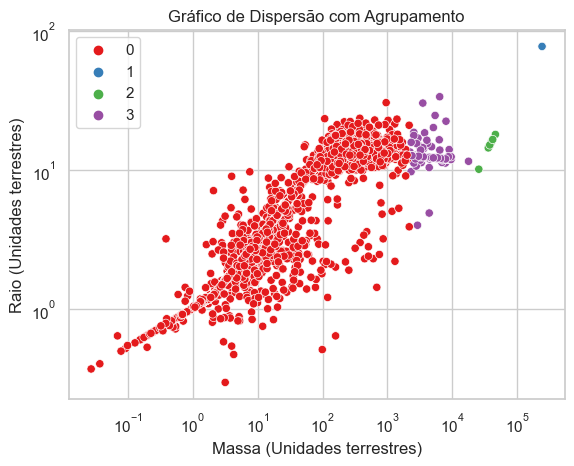

Os valores de cada grupo separado foram: [4538    1    8  230]


In [ ]:

SEMENTE_ALEATORIA = 67 # O valor pode ser variado
NUM_GRUPOS = 4 # Divisão dos tipos ('Gas Giant', 'Super Earth', 'Neptune-like', 'Terrestrial')

agrupador = KMeans(n_clusters=NUM_GRUPOS, random_state=SEMENTE_ALEATORIA, n_init="auto") # Gearndo o modelo

agrupador.fit(X) # Fazendo o agrupasmento dos dados

rotulos = agrupador.labels_ # Pegandos os rotulos de cada grupo

Dados_por_grupos = np.bincount(rotulos) # Contando o valor de cada grupo

sns.scatterplot(x=X['mass'], y=X['radius'], hue=rotulos, palette="Set1")
plt.xlabel("Massa (Unidades terrestres)")
plt.ylabel("Raio (Unidades terrestres)")
plt.xscale('log')
plt.yscale('log')
plt.title("Gráfico de Dispersão com Agrupamento")
plt.show()

print(f'Os valores de cada grupo separado foram: {Dados_por_grupos}')


Como podemos observar acima, os valores dos grupos foram extremamanete diferentes dos valores corretos para a divisão do tipo de planetas

### DBS Scan

O palpite para o raio da vizinhança é 14.449715999999993


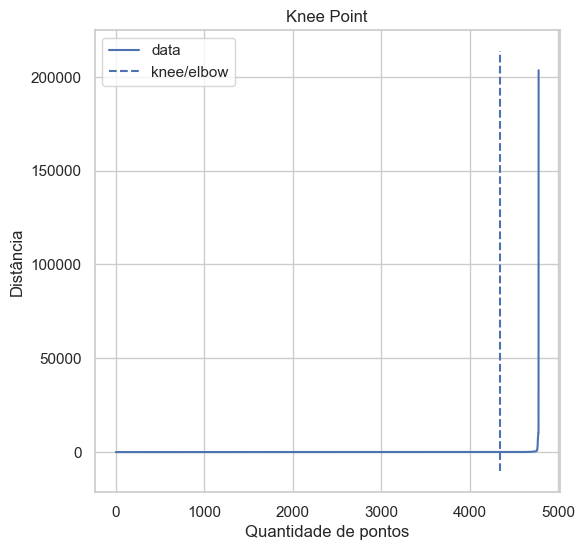

In [ ]:
'''Pegando palpites'''

num_atributos = X.shape[-1] # Pegando o número de atributos do dataset

palpite_num_min_vizinhos = 2 * num_atributos # Gerando um valor palpite para o número minimo de vizinhos

palpite_raio_vizinhanca = gera_palpite_raio_vizinhanca(X, palpite_num_min_vizinhos) # Gerando um valor palpite para o número minimo do raio da vizinhança

Agora vamos aplicar os palpites n o modelo veremos sua performance

Número de grupos identificados: 13
Número de exemplos anômalos (outliers) indentificados: 310


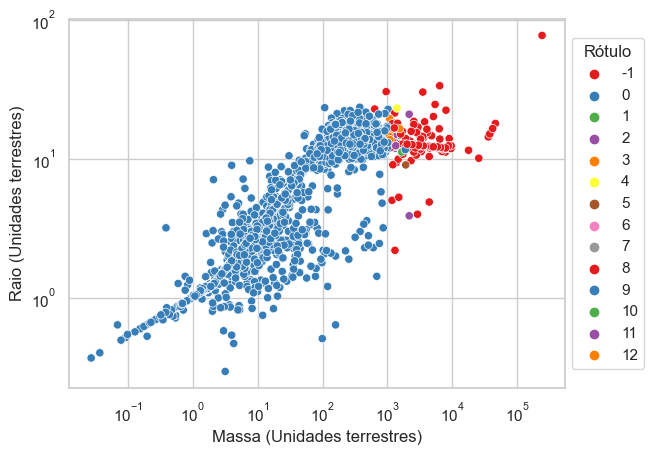

In [ ]:
'''Teste dos palpites'''

RAIO_VIZINHANCA = palpite_raio_vizinhanca # Definindo o raio da vizinhança
NUM_MIN_VIZINHOS = palpite_num_min_vizinhos # Definindo o raio da vizinhança

agrupador = DBSCAN(eps=RAIO_VIZINHANCA, min_samples=NUM_MIN_VIZINHOS) # Gearndo o modelo

agrupador.fit(X) # Fazendo o agrupasmento dos dados

rotulos = agrupador.labels_ # Pegandos os rotulos de cada grupo

n_outliers = list(rotulos).count(-1) # Definindo o número de outlines
n_grupos = len(set(rotulos)) # Definindo o número de grupos

if n_outliers > 0:
    n_grupos = n_grupos - 1 # Corrigindo o número de grupos, retirando os outlines

print(f"Número de grupos identificados: {n_grupos}")
print(f"Número de exemplos anômalos (outliers) indentificados: {n_outliers}")

sns.scatterplot(x=X['mass'], y=X['radius'], hue=rotulos, palette="Set1")
plt.xlabel("Massa (Unidades terrestres)")
plt.ylabel("Raio (Unidades terrestres)")
plt.xscale('log')
plt.yscale('log')
plt.legend(title="Rótulo", loc="center left", bbox_to_anchor=(1, 0.5));

Vemos acima que o resultado não foi nem proximo do esperado, com isso vamos ajustar os valores dos palpites até alcançarmos o melhor resultados possivel

Número de grupos identificados: 4
Número de exemplos anômalos (outliers) indentificados: 519


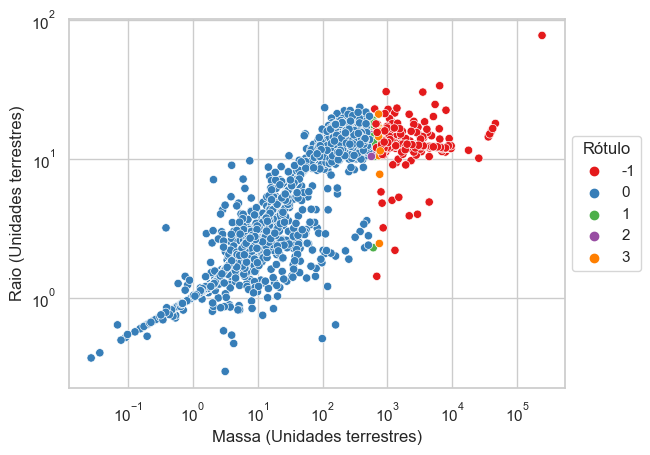

In [ ]:
'''Valores finais definidos'''

RAIO_VIZINHANCA = 16 # Definindo o raio da vizinhança
NUM_MIN_VIZINHOS = 20 # Definindo o raio da vizinhança

agrupador = DBSCAN(eps=RAIO_VIZINHANCA, min_samples=NUM_MIN_VIZINHOS) # Gearndo o modelo

agrupador.fit(X) # Fazendo o agrupasmento dos dados

rotulos = agrupador.labels_ # Pegandos os rotulos de cada grupo

n_outliers = list(rotulos).count(-1) # Definindo o número de outlines
n_grupos = len(set(rotulos)) # Definindo o número de grupos

if n_outliers > 0:
    n_grupos = n_grupos - 1 # Corrigindo o número de grupos, retirando os outlines

print(f"Número de grupos identificados: {n_grupos}")
print(f"Número de exemplos anômalos (outliers) indentificados: {n_outliers}")

sns.scatterplot(x=X['mass'], y=X['radius'], hue=rotulos, palette="Set1")
plt.xlabel("Massa (Unidades terrestres)")
plt.ylabel("Raio (Unidades terrestres)")
plt.xscale('log')
plt.yscale('log')
plt.legend(title="Rótulo", loc="center left", bbox_to_anchor=(1, 0.5));

Ápos varios testes, esse foi o melhor resultado que conseguimos e mesmo assim, está muito diferendo do esperado, sendo que temos mais de 500 outlines.

### Hierárquico

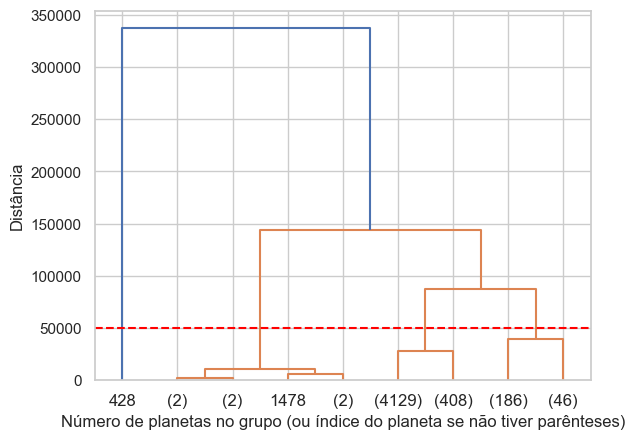

In [ ]:
''''''

METODO_DISTANCIA = "ward" # Distância de variância mínima, melhor metodo encontrado

agrupador = linkage(X, METODO_DISTANCIA)  # Gearndo o modelo

NIVEL_MAXIMO = 3 # Definindo tamanho maximo do nível

dendrogram(agrupador, truncate_mode="level", p=NIVEL_MAXIMO)

plt.axhline(50000, linestyle="--", color="red")
plt.xlabel("Número de planetas no grupo (ou índice do planeta se não tiver parênteses)")
plt.ylabel("Distância");
plt.show()

Embora tenha sido o melhor metodo agora, ainda não está proximo o suficiente para dizermos que os dados atmosfericos são indispensaveis

In [ ]:

SEMENTE_ALEATORIA = 1000
TAMANHO_TESTE = 0.15
FEATURES = df_tratado.drop(['planet_type'], axis=1)
TARGET = df_tratado['planet_type']

df_treino, df_teste = train_test_split(
    df_tratado, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA)

X_treino = df_treino.drop('planet_type', axis=1)
y_treino = df_treino['planet_type']

X_teste = df_teste.drop('planet_type', axis=1)
y_teste = df_teste['planet_type']

In [ ]:

modelo_rf = RandomForestClassifier(random_state=SEMENTE_ALEATORIA)

#treino geralllllllllll
modelo_rf.fit(X_treino, y_treino)

y_previsao = modelo_rf.predict(X_teste)

acuracia = accuracy_score(y_teste, y_previsao)

print(f"A acurácia do modelo árvore de decisão foi de", acuracia)

#fazendo teste com a primeira linha (dado que já existe)
exemplo = [4.72307, 1.290000, 0.892539, 0.23, 6165.320000, 12.0960, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
df_exem = pd.DataFrame([exemplo])
previsao_exemplo = modelo_rf.predict(df_exem)

print("A previsão para o exemplo é:", previsao_exemplo)

A acurácia do modelo árvore de decisão foi de 0.9707112970711297
A previsão para o exemplo é: ['Gas Giant']


C:\Users\eric23014\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## **Realizando as previsões a partir de diferentes modelos**

Nesta etapa, serão realizadas as previsões dos dados a partir dos dados tratados, aplicando 5 modelos distintos. O target deste dataset refere-se justamente a qual tipo de planeta aquele exoplaneta com determinadas características observadas ele se encaixará. Para isso, é necessário compreender que, pelo motivo de haver um target categórico, não se torna possível aplicar regressores lineares para prever os resultados. Além desse motivo, ressalta-se que esse esse tipo de target não é binário, isto é, temos mais que apenas duas opções para classificar os inputs recebidos:

- SuperEarth 
- Neptune-like
- Terrestrial
- Gas giant

Portanto, serão aplicados modelos classificadores capazes de receber como input uma mistura de dados categóricos (transformados para numéricos pelo OneHotEncoder) e numéricos e obter um output de um dos 4 possíveis tipos de planeta. Os modelos aplicados são:

- KNeighborsClassifier
- DecisionTree
- RandomForest
- LogisticRegression
- Adaboost

Sendo que serão feitas as comparações em relação às performances para cada um dos tipos. Antes, serão definidas variáveis que serão utilizadas nos regressores.

In [21]:
# Fixando o número da semente para não haver uma variação 
SEMENTE_ALEATORIA = 1000

# Fração dos dados do dataset que serão utilizados para o teste
TAMANHO_TESTE = 0.15

# Definindo as features e o target 
FEATURES = df_tratado.drop(['planet_type'], axis=1)
TARGET = df_tratado['planet_type']

# Separando dados de treino e teste
df_treino, df_teste = train_test_split(
    df_tratado, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA)

# Dados de treino
X_treino = df_treino.drop('planet_type', axis=1)
y_treino = df_treino['planet_type']

# Dados de teste
X_teste = df_teste.drop('planet_type', axis=1)
y_teste = df_teste['planet_type']

### **KneighborsClassifier**

O K-NN é um modelo amplamente utilizado para modelos de previsão de dados. A sua aplicabilidade torna-se útil por admitir regressão e classificação para as informações.

Este modelo recebe um determinado dado em que não estava classificado anteriormente. Em seguida, são calculadas as distâncias em relação a todos os outros dados existentes no dataset (calculando distância Euclidiana, Manhattan, Minkowski ou Ponderada). A partir disso, considerando o número de vizinhos indicado, o modelo irá analisar qual classe dos dados em que estão em menores distâncias dentro do número de vizinhos selecionado, retornando, portanto, a variável que mais se repetiu na vizinhança.

Para isso, será feita uma análise em relação ao comportamento do KNN neste dataset, vendo, por fim, a sua performance. 

### Aplicando o modelo de previsão

O modelo do k-NN será aplicado abaixo:

In [22]:
# Determinando o número de vizinhos 
VIZINHOS = 3

modelo_knn = KNeighborsClassifier(n_neighbors=VIZINHOS)

# Ajustando o modelo
modelo_knn.fit(X_treino, y_treino)

# Realizando a previsão 
y_previsao_knn = modelo_knn.predict(X_teste)

# Analisando a acurácia entre os valores reservados para teste e os valores previstos pelo modelo
acuracia_knn = accuracy_score(y_teste, y_previsao_knn)
print("A acurácia do modelo k-NN foi de", acuracia_knn*100, "%")

A acurácia do modelo k-NN foi de 95.53695955369595 %


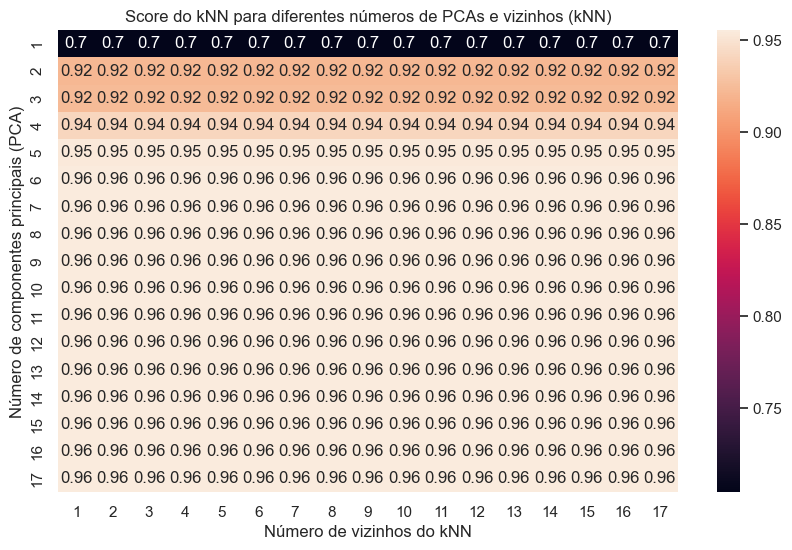

In [23]:
score_pca_heatmap = []

# Variando o número de PCAs
for num_comp_princ in range(1, 18):
    score = []
    pca = PCA(n_components=num_comp_princ)
    X_treino_pca = pca.fit_transform(X_treino)
    X_teste_pca = pca.transform(X_teste)
    
    # Variando o número de vizinhos
    for num_vizinhos in range (1,18):
        modelo_knn_composto_pca = KNeighborsClassifier(n_neighbors=VIZINHOS)
        modelo_knn_composto_pca.fit(X_treino_pca, y_treino)
        previsao = modelo_knn_composto_pca.score(X_teste_pca, y_teste)
        score.append(previsao)
    score_pca_heatmap.append(score)

# Transformando para array
score_array = np.array(score_pca_heatmap)

plt.figure(figsize=(10, 6))
sns.heatmap(score_array, annot=True, xticklabels=range(1, 18), yticklabels=range(1, 18))
plt.xlabel('Número de vizinhos do kNN')
plt.ylabel('Número de componentes principais (PCA)')
plt.title('Score do kNN para diferentes números de PCAs e vizinhos (kNN)')
plt.show()

Observa-se que o PCA afeta a performance do modelo a partir de quando há uma redução drástica do número de componentes principais. No entanto, podemos observar que a performance se mantém constante mesmo com a variação do número de vizinhos e ao menos com uma redução de features pela metade. Isso indica, logo, que o k-NN fez uma boa predição para os dados.

### **Decision Tree**

A árvore de decisão é um modelo aplicado para previsões tanto de dados numéricos quanto também de categóricos. Ele funciona em um sistema de "se-então" ou "True-false", que, desse modo, uma *vértice raiz* (primeira condição para as próximas separações) possa separar os dados para dois novos *vértices de decisão* (estes que permanecem em sua estrutura para a separação dos dados, realizando novas condições a partir delas) até chegar nas *vértices folha* (as quais são produtos de uma separação total ao fim da quantidade de condições que foram definidas anteriormente).

Inicialmente, a previsão pode ser feita, também, utilizando os dados de treino e teste anteriormente separados.


In [24]:
modelo_dt = DecisionTreeClassifier(random_state=SEMENTE_ALEATORIA)

# Ajustando o modelo
modelo_dt.fit(X_treino, y_treino)

# Realizando a previsão 
y_previsao_dt = modelo_dt.predict(X_teste)

# Analisando a acurácia entre os valores reservados para teste e os valores previstos pelo modelo
acuracia_dt = accuracy_score(y_teste, y_previsao_dt)
print("A acurácia do modelo árvore de decisão foi de", acuracia_dt*100, "%")

A acurácia do modelo árvore de decisão foi de 97.62900976290098 %


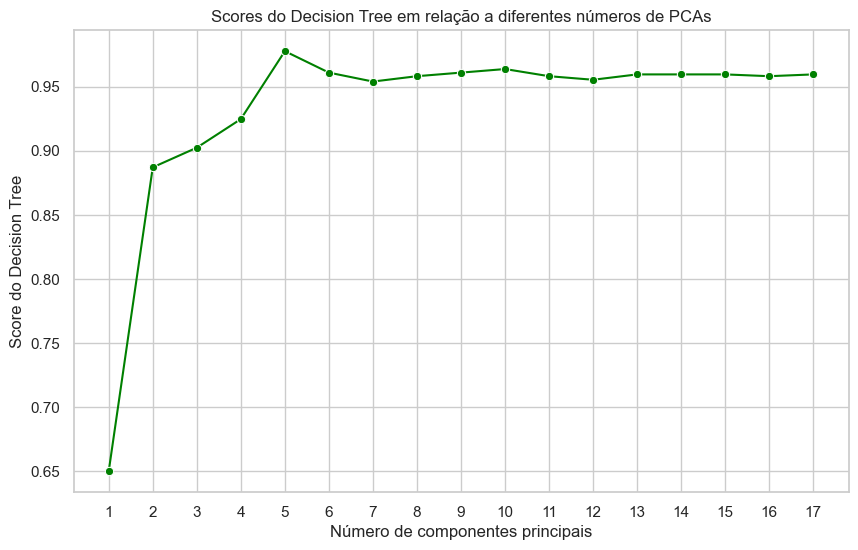

In [25]:
# Gerando lista para armazenar os scores
score_dt_pca = []

# Variando o número de 1 a 17, já que temos 17 features
for num_comp_princ in range(1, 18):
    pca = PCA(n_components=num_comp_princ)
    X_treino_pca = pca.fit_transform(X_treino)
    X_teste_pca = pca.transform(X_teste)

    modelo_dt_pca = DecisionTreeClassifier(random_state=SEMENTE_ALEATORIA)
    modelo_dt_pca.fit(X_treino_pca, y_treino)
    # Previsão utilizando o modelo ajustado com PCA
    y_previsao_dt = modelo_dt_pca.predict(X_teste_pca)
    # Acurácia
    acuracia_dt = accuracy_score(y_teste, y_previsao_dt) 
    score_dt_pca.append(acuracia_dt)

plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, 18), y=score_dt_pca, marker='o', color='green')
plt.xlabel('Número de componentes principais')
plt.ylabel('Score do Decision Tree')
plt.title('Scores do Decision Tree em relação a diferentes números de PCAs')
plt.xticks(np.arange(1, 18, 1))
plt.grid(True)
plt.show()

Assim como no k-NN, vemos que a previsão se torna pior à medida que há uma redução muito grande da dimensionalidade. No entanto, podemos observar um pico quando o número de PCAs é igual a 5, indicando que a árvore de decisão prevê melhor do que quando está em um número de dimensões maior, por exemplo, já que há um maior custo computacional.

### Otimização de hiperparametros e matriz de confusão

In [ ]:
SEMENTE_ALEATORIA = 1000
TAMANHO_TESTE = 0.15
NUM_FOLDS = 5  #é permitido alterar!!!


# Definição do espaço de busca para hiperparâmetros
param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8]
}

# Estratégia de validação cruzada estratificada
cv_stratified = StratifiedKFold(n_splits=NUM_FOLDS, shuffle=True, random_state=SEMENTE_ALEATORIA)

# Realização da busca por hiperparâmetros otimizados
busca_dt = GridSearchCV(
    modelo_dt,
    param_grid_dt,
    cv=cv_stratified,
    scoring="accuracy",
    refit=True,
    n_jobs=-1
)

busca_dt.fit(X_treino, y_treino)

# Obtendo os melhores hiperparâmetros
melhores_hiperparametros_dt = busca_dt.best_params_

# Treinando o modelo otimizado com os melhores hiperparâmetros
modelo_dt_otimizado = DecisionTreeClassifier(random_state=SEMENTE_ALEATORIA, **melhores_hiperparametros_dt)
modelo_dt_otimizado.fit(X_treino, y_treino)

# Fazendo previsões com o modelo otimizado
y_previsao_otimizado_dt = modelo_dt_otimizado.predict(X_teste)

# Avaliando métricas do modelo otimizado
acuracia_otimizado_dt = accuracy_score(y_teste, y_previsao_otimizado_dt)
precisao_otimizado_dt = precision_score(y_teste, y_previsao_otimizado_dt, average='macro')
recall_otimizado_dt = recall_score(y_teste, y_previsao_otimizado_dt, average='macro')
f1_otimizado_dt = f1_score(y_teste, y_previsao_otimizado_dt, average='macro')

# Treinando o modelo não otimizado
modelo_dt.fit(X_treino, y_treino)

# Fazendo previsões com o modelo não otimizado
y_previsao_nao_otimizado_dt = modelo_dt.predict(X_teste)

# Avaliando métricas do modelo não otimizado
acuracia_nao_otimizado_dt = accuracy_score(y_teste, y_previsao_nao_otimizado_dt)
f1_nao_otimizado_dt = f1_score(y_teste, y_previsao_nao_otimizado_dt, average='macro')
recall_nao_otimizado_dt = recall_score(y_teste, y_previsao_nao_otimizado_dt, average='macro')
precisao_nao_otimizado_dt = precision_score(y_teste, y_previsao_nao_otimizado_dt, average='macro')

print(f"A acurácia do modelo Árvore de Decisão sem otimização foi de {acuracia_nao_otimizado_dt}")
print(f"A acurácia do modelo Árvore de Decisão final com otimização foi de {acuracia_otimizado_dt}")
print(f"Precisão do modelo Árvore de Decisão não otimizado: {precisao_nao_otimizado_dt}")
print(f"Precisão do modelo Árvore de Decisão final: {precisao_otimizado_dt}")
print(f"Recall do modelo Árvore de Decisão não otimizado: {recall_nao_otimizado_dt}")
print(f"Recall do modelo Árvore de Decisão final: {recall_otimizado_dt}")
print(f"F1-score do modelo Árvore de Decisão não otimizado: {f1_nao_otimizado_dt}")
print(f"F1-score do modelo Árvore de Decisão final: {f1_otimizado_dt}")
print("Melhores hiperparâmetros Árvore de Decisão:", melhores_hiperparametros_dt)


In [ ]:
# Fazendo previsões com o modelo não otimizado
y_previsao_nao_otimizado_dt = modelo_dt.predict(X_teste)

# Matriz de confusão para Árvore de Decisão não otimizada
plot_confusion_matrix(y_teste, y_previsao_nao_otimizado_dt, 'Confusion Matrix - Decision Tree (Non-optimized)')

# Matriz de confusão para Árvore de Decisão otimizada
plot_confusion_matrix(y_teste, y_previsao_otimizado_dt, 'Confusion Matrix - Decision Tree (Optimized)')

### **Random Forest**

A floresta aleatória, por sua vez, se classifica como uma união de várias árvores de decisão agindo em conjunto. Nesse caso, o número de árvores e splits a serem realizados são definidos (a variação deles altera a performance da previsão). Como são várias árvores, cada uma delas terá um resultado para que, ao fim, haja uma predição com maior acurácia. Além disso, isso tende a ter uma maior estabilidade pelo motivo de haver *condições diferentes e aleatórias* para cada árvore que está dentro do modelo. 

Utilizando este modelo abaixo:

In [26]:
modelo_rf = RandomForestClassifier(random_state=SEMENTE_ALEATORIA)

# Ajustando o modelo
modelo_rf.fit(X_treino, y_treino)

# Realizando a previsão 
y_previsao_rf = modelo_rf.predict(X_teste)

# Analisando a acurácia entre os valores reservados para teste e os valores previstos pelo modelo
acuracia_rf = accuracy_score(y_teste, y_previsao_rf)
print("A acurácia do modelo árvore de decisão foi de", acuracia_rf*100, "%")

A acurácia do modelo árvore de decisão foi de 97.07112970711297 %


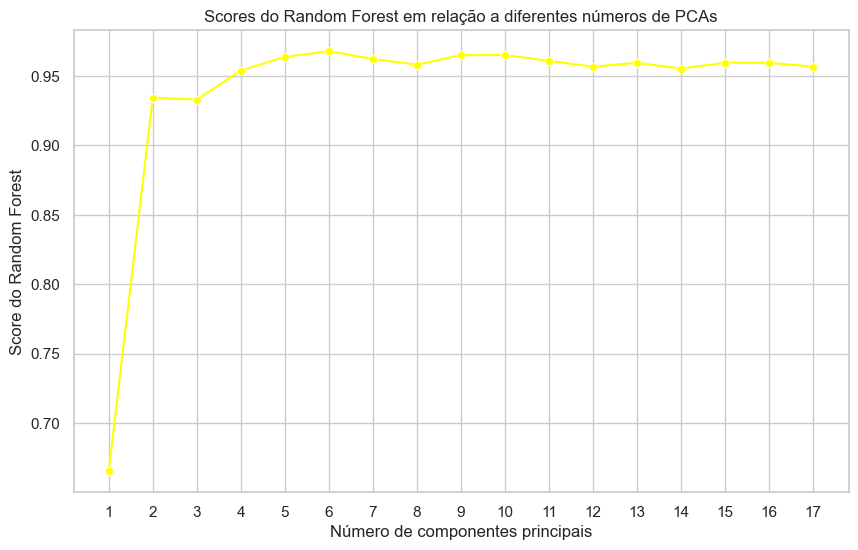

In [27]:
# Gerando lista para armazenar os scores
score_rf_pca = []

# Variando o número de 1 a 17, já que temos 17 features
for num_comp_princ in range(1, 18):
    pca = PCA(n_components=num_comp_princ)
    X_treino_pca = pca.fit_transform(X_treino)
    X_teste_pca = pca.transform(X_teste)

    modelo_rf_pca = RandomForestClassifier(random_state=SEMENTE_ALEATORIA)
    modelo_rf_pca.fit(X_treino_pca, y_treino)
    # Previsão utilizando o modelo ajustado com PCA
    y_previsao_rf = modelo_rf_pca.predict(X_teste_pca)
    # Acurácia
    acuracia_rf = accuracy_score(y_teste, y_previsao_rf) 
    score_rf_pca.append(acuracia_rf)

plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, 18), y=score_rf_pca, marker='o', color='yellow')
plt.xlabel('Número de componentes principais')
plt.ylabel('Score do Random Forest')
plt.title('Scores do Random Forest em relação a diferentes números de PCAs')
plt.xticks(np.arange(1, 18, 1))
plt.grid(True)
plt.show()

Para o random forest, observa-se que não houve uma grande variação à medida que aumentam o número de componentes. No entanto, observa-se uma performance ainda muito boa de previsão.

### Otimização de hiperparametros e matriz de confusão

In [46]:

SEMENTE_ALEATORIA = 1000
TAMANHO_TESTE = 0.15
NUM_FOLDS = 5 #pode ser alterado

# Definição do espaço de busca para hiperparâmetros
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8]
}

# Estratégia de validação cruzada estratificada
cv_stratified = StratifiedKFold(n_splits=NUM_FOLDS, shuffle=True, random_state=SEMENTE_ALEATORIA)

# Realização da busca por hiperparâmetros otimizados
busca_rf = GridSearchCV(
    modelo_rf,
    param_grid,
    cv=cv_stratified,
    scoring="accuracy",
    refit=True,
    n_jobs=-1
)

busca_rf.fit(X_treino, y_treino)

# Obtendo os melhores hiperparâmetros
melhores_hiperparametros = busca_rf.best_params_

# Treinando o modelo otimizado com os melhores hiperparâmetros
modelo_rf_otimizado = RandomForestClassifier(random_state=SEMENTE_ALEATORIA, **melhores_hiperparametros)
modelo_rf_otimizado.fit(X_treino, y_treino)

# Fazendo previsões com o modelo otimizado
y_previsao_otimizado = modelo_rf_otimizado.predict(X_teste)

# Avaliando métricas do modelo otimizado
acuracia_otimizado = accuracy_score(y_teste, y_previsao_otimizado)
precisao_otimizado = precision_score(y_teste, y_previsao_otimizado, average='macro')
recall_otimizado = recall_score(y_teste, y_previsao_otimizado, average='macro')
f1_otimizado = f1_score(y_teste, y_previsao_otimizado, average='macro')

# Treinando o modelo não otimizado
modelo_rf.fit(X_treino, y_treino)

# Fazendo previsões com o modelo não otimizado
y_previsao_nao_otimizado = modelo_rf.predict(X_teste)

# Avaliando os scores 
acuracia_nao_otimizado = accuracy_score(y_teste, y_previsao_nao_otimizado)
f1_nao_otimizado = f1_score(y_teste, y_previsao_nao_otimizado, average='macro')
recall_nao_otimizado = recall_score(y_teste, y_previsao_nao_otimizado, average='macro')
precisao_nao_otimizado = precision_score(y_teste, y_previsao_nao_otimizado, average='macro')

print(f"A acurácia do modelo floresta aleatória sem otimização foi de {acuracia_nao_otimizado}")
print(f"A acurácia do modelo final com otimização foi de {acuracia_otimizado}")
print(f"Precisão do modelo não otimizado: {precisao_nao_otimizado}")
print(f"Precisão do modelo final: {precisao_otimizado}")
print(f"Recall do modelo não otimizado: {recall_nao_otimizado}")
print(f"Recall do modelo final: {recall_otimizado}")
print(f"F1-score do modelo não otimizado: {f1_nao_otimizado}")
print(f"F1-score do modelo final: {f1_otimizado}")
print("Melhores hiperparâmetros:", melhores_hiperparametros)


KeyboardInterrupt: 

In [ ]:
# Treinando o modelo não otimizado
modelo_rf.fit(X_treino, y_treino)

# Fazendo previsões com o modelo não otimizado
y_previsao_nao_otimizado = modelo_rf.predict(X_teste)

# Criando a matriz de confusão para o modelo não otimizado
confusao_rf_nao_otimizado = confusion_matrix(y_teste, y_previsao_nao_otimizado)

plt.figure(figsize=(8, 6))
sns.heatmap(confusao_rf_nao_otimizado, annot=True, fmt='d', cmap='Blues', xticklabels=modelo_rf.classes_, yticklabels=modelo_rf.classes_)
plt.title('Matriz de Confusão: Floresta Aleatória Não Otimizada')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()


In [ ]:
# Criando a matriz de confusão para o modelo otimizado
confusao_rf_otimizado = confusion_matrix(y_teste, y_previsao_otimizado)

plt.figure(figsize=(8, 6))
sns.heatmap(confusao_rf_otimizado, annot=True, fmt='d', cmap='Blues', xticklabels=modelo_rf.classes_, yticklabels=modelo_rf.classes_)
plt.title('Matriz de Confusão: Floresta Aleatória Otimizada')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()


### **Adaboost**

Adaboost é um modelo que também toma como base o uso das árvores de decisão para a sua predição. A ideia principal interna do boosting é gerar um modelo final que seja "forte" (isto é, possui uma boa performance) a partir da correção iterativa dos modelos "fracos" anteriores. Funciona como uma sequência de correção de erros de underfitting, até o momento em que a taxa de erro diminua até certo limite estabelecido e consiga se tornar um modelo forte.

Assim, a sequência de ações acontece em determinadas etapas:

- 1: Para as amostras de dados, o algoritmo atribui pesos iguais para todos eles.
- 2: Em seguida, utiliza todas as previsões em árvores de decisão (é caracterizado como um classificador fraco)
- 3: Ao obter os resultados, o modelo atribui peso maior para aquelas que classificaram de maneira mais errônea anteriormente
- 4: Depois, os classificadores com erro mais preciso obtêm os pesos atualizados para um peso maior
- 5: a etapa é iterada diversas vezes até que atinja os valores definidos pelos hiperparâmetros 
- 6: Ao fim, os classificadores fracos são ponderados de acordo com o seu desempenho e combinados para realizar a previsão final

Para o código, estamos utilizando os parâmetros:

- n_estimators: indica o número de classificadores fracos (árvores de decisão)
- learning_rate: indica o peso de contribuição de cada interação boosting
- random_state: fixa a semente para que o código seja rodado

Podemos visualizar seu comportamento a partir do código abaixo:

In [28]:
# Criando uma instância do LabelEncoder
le = LabelEncoder()

# Transformando o conjunto de treino
y_treino = le.fit_transform(y_treino)

# Transformando o conjunto de teste 
y_teste = le.transform(y_teste)

# Aplicando o modelo em uma variável
modelo_abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=SEMENTE_ALEATORIA)

# Ajustando o modelo
modelo_abc.fit(X_treino, y_treino)

# Previsão
y_previsao_abc = modelo_abc.predict(X_teste)

# Acurácia
acuracia_adaboost = accuracy_score(y_teste, y_previsao_abc)
print("A acurácia do modelo adaboost foi de", acuracia_adaboost*100, "%")

A acurácia do modelo adaboost foi de 71.1297071129707 %


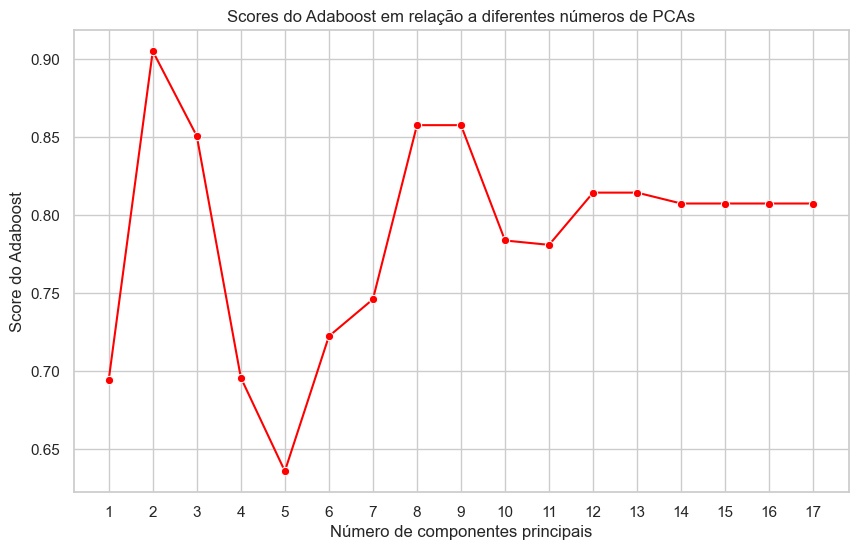

In [29]:
# Gerando lista para armazenar os scores
score_abc_pca = []

# Variando o número de 1 a 17, já que temos 17 features
for num_comp_princ in range(1, 18):
    pca = PCA(n_components=num_comp_princ)
    X_treino_pca = pca.fit_transform(X_treino)
    X_teste_pca = pca.transform(X_teste)
    
    le = LabelEncoder()
    y_treino = le.fit_transform(y_treino)
    y_teste = le.transform(y_teste)

    modelo_abc_pca = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=SEMENTE_ALEATORIA)
    modelo_abc_pca.fit(X_treino_pca, y_treino)
    # Previsão utilizando o modelo ajustado com PCA
    y_previsao_abc = modelo_abc_pca.predict(X_teste_pca)
    # Acurácia
    acuracia_adaboost = accuracy_score(y_teste, y_previsao_abc)
    score_abc_pca.append(acuracia_adaboost)

plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, 18), y=score_abc_pca, marker='o', color='red')
plt.xlabel('Número de componentes principais')
plt.ylabel('Score do Adaboost')
plt.title('Scores do Adaboost em relação a diferentes números de PCAs')
plt.xticks(np.arange(1, 18, 1))
plt.grid(True)
plt.show()

Por mais que o funcionamento interno do modelo seja por correção de erros anteriores, a aleatoriedade e os diferentes pesos atribuídos a cada iteração fez com que a previsão obtivesse performances totalmente diferentes ao longo do número de componentes. Assim, não garantiu uma acurácia boa de maneira com que seja, de fato, um modelo que prevê bem *em relação a este dataset*.

### Otimização de hiperparametros

In [ ]:

SEMENTE_ALEATORIA = 1000
TAMANHO_TESTE = 0.15
NUM_FOLDS = 5  #pode ser alterado


# Definição do espaço de busca para hiperparâmetros
param_grid_adaboost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1]
}

# Estratégia de validação cruzada estratificada
cv_stratified = StratifiedKFold(n_splits=NUM_FOLDS, shuffle=True, random_state=SEMENTE_ALEATORIA)

# Realização da busca por hiperparâmetros otimizados
busca_adaboost = GridSearchCV(
    modelo_adaboost,
    param_grid_adaboost,
    cv=cv_stratified,
    scoring="accuracy",
    refit=True,
    n_jobs=-1
)

busca_adaboost.fit(X_treino, y_treino)

# Obtendo os melhores hiperparâmetros
melhores_hiperparametros_adaboost = busca_adaboost.best_params_

# Treinando o modelo otimizado com os melhores hiperparâmetros
modelo_adaboost_otimizado = AdaBoostClassifier(random_state=SEMENTE_ALEATORIA, **melhores_hiperparametros_adaboost)
modelo_adaboost_otimizado.fit(X_treino, y_treino)

# previsões com o modelo otimizado
y_previsao_otimizado_adaboost = modelo_adaboost_otimizado.predict(X_teste)

# Avaliando os scores do modelo otimizado
acuracia_otimizado_adaboost = accuracy_score(y_teste, y_previsao_otimizado_adaboost)
precisao_otimizado_adaboost = precision_score(y_teste, y_previsao_otimizado_adaboost, average='macro')
recall_otimizado_adaboost = recall_score(y_teste, y_previsao_otimizado_adaboost, average='macro')
f1_otimizado_adaboost = f1_score(y_teste, y_previsao_otimizado_adaboost, average='macro')

# Treinando o modelo nao otimizado
modelo_adaboost.fit(X_treino, y_treino)

# Previsões (não otimizado)
y_previsao_nao_otimizado_adaboost = modelo_adaboost.predict(X_teste)

# Avaliando os scores do modelo não otimizado
acuracia_nao_otimizado_adaboost = accuracy_score(y_teste, y_previsao_nao_otimizado_adaboost)
f1_nao_otimizado_adaboost = f1_score(y_teste, y_previsao_nao_otimizado_adaboost, average='macro')
recall_nao_otimizado_adaboost = recall_score(y_teste, y_previsao_nao_otimizado_adaboost, average='macro')
precisao_nao_otimizado_adaboost = precision_score(y_teste, y_previsao_nao_otimizado_adaboost, average='macro')

print(f"A acurácia do modelo AdaBoost sem otimização foi de {acuracia_nao_otimizado_adaboost}")
print(f"A acurácia do modelo AdaBoost final com otimização foi de {acuracia_otimizado_adaboost}")
print(f"Precisão do modelo AdaBoost não otimizado: {precisao_nao_otimizado_adaboost}")
print(f"Precisão do modelo AdaBoost final: {precisao_otimizado_adaboost}")
print(f"Recall do modelo AdaBoost não otimizado: {recall_nao_otimizado_adaboost}")
print(f"Recall do modelo AdaBoost final: {recall_otimizado_adaboost}")
print(f"F1-score do modelo AdaBoost não otimizado: {f1_nao_otimizado_adaboost}")
print(f"F1-score do modelo AdaBoost final: {f1_otimizado_adaboost}")
print("Melhores hiperparâmetros AdaBoost:", melhores_hiperparametros_adaboost)


### **Logistic Regression**

O Logistic Regression é um modelo *classificador*. Ele é um modelo em que utiliza uma função sigmoide capaz de calcular a probabilidade de que uma instância esteja em determinada classe ou não. Nesse caso, normalmente se fazem aplicações com casos binários, no entanto, neste caso, será utilizado para um contexto multiclasse (uma vez que temos 4 possíveis resultados de classificação). De maneira geral, tem-se uma função sigmoide dada por:

$$
P(y_i=1 | X_i) = \frac{1}{1 + \exp(-(\sum_{n=1}^N x_n \beta_n + \beta_0))},
$$

em que: 

- $P(y_i=1 | X_i)$ é a probabilidade condicional para que a variável dependente seja igual a 1
- $\beta_n$ representa os pesos para cada variável independente do conjunto

Nesse caso, como tem-se uma situação multiclasse, é necessária a observação em de maneira distinta. Assim, vamos considerar dois subtipos da Regressão Logística: *multimodal* e *one vs rest*. Para isso, utilizamos os parâmetros a seguir:

Assim, utilizamos os parâmetros a seguir: 

- max_iter: número de iterações 
- multi_class: tipo de classificador multiclasse que será utilizado 
- solver: algoritmo otimizador da função de regressão

### Multimodal

Esse parâmetro multimodal é capaz de considerar todas as multiclasses e realizar o cálculo de probabilidade para todas elas. Esse parâmetro utiliza constituintes internos para calcular essa probabilidade. Ao fim, a decisão final é realizada a partir da classe que se apresentou em maior probabilidade de ocorrência. 

Podemos visualizar esse tipo de classificador pelo código abaixo:

In [30]:

NUMERO_ITERACOES = 10000
multi_logreg = LogisticRegression(max_iter = NUMERO_ITERACOES, multi_class='multinomial',
                                  solver='lbfgs')
# Ajustando os dados
multi_logreg.fit(X_treino, y_treino)

# Previsão
y_previsao_multi = multi_logreg.predict(X_teste)

# Acurácia
acuracia_multimodal = accuracy_score(y_teste, y_previsao_multi)
print("A acurácia do modelo regressão logística (multimodal) foi de", acuracia_multimodal*100, "%")

# Às vezes pode aparecer um erro em vermelho, mas basta alterar o número de iterações para um valor maior.

A acurácia do modelo regressão logística (multimodal) foi de 93.58437935843794 %


A performance do modelo apresentou-se de maneira boa, sendo passível de ser comparado a outros modelos com ótimas performances, como o k-NN, decision tree e o random forest.

### One vs rest

Esse parâmetro utiliza uma análise por pares. Em tese, para cada possível classe, há uma comparação dele com todos os outros, calculando a probabilidade a partir disso. Em outras palavras, se temos as classes A, B, C e D, existem as seguintes comparações:

- A vs todo o resto (B, C e D)
- B vs todo o resto (A, C e D)
- C vs todo o resto (A, B e D)
- D vs todo o resto (A, B e C)

O cálculo funciona como uma classificação binária para cada linha de comparação, mas, ao final, é decidido aquela classe que possui maior probabilidade de ocorrência. O código para esse parâmetro está abaixo:

In [31]:
ovr_logreg = LogisticRegression(max_iter = NUMERO_ITERACOES, multi_class='ovr',
                                solver='liblinear')

# Ajuste 
ovr_logreg.fit(X_treino, y_treino)

# Previsão
y_previsao_ovr = ovr_logreg.predict(X_teste)

acuracia_ovr = accuracy_score(y_teste, y_previsao_ovr) 

print("A acurácia do modelo regressão logística (One vs Rest) foi de", acuracia_ovr*100, "%")


A acurácia do modelo regressão logística (One vs Rest) foi de 89.6792189679219 %


Vê-se que existe uma boa acurácia, mas um pouco pior em relação ao multimodal. Diversos fatores podem influenciar para essa diferença, mas é plausível destacar, principalmente, pela natureza das features, já que existem alguns dados considerados outliers e que o modelo acaba realizando uma previsão menos robusta.

### One vs One

One vs one é um outro tipo de classificador, em que utiliza um raciocínio similar ao One vs Rest, no entanto, realiza a comparação de cada classe por outra classe. Em outras palavras, são realizados todos os cálculos para todas as combinações possíveis das classes, de maneira com que, ao final, há a análise de quem obteve maior probabilidade, similar a uma competição de jogo de futebol, por exemplo. Assim, se temos as classes A, B e C, então os cálculos serão feitos por:

- A x B
- B x C
- C x A

e assim encontra-se a classe. Para isso, utiliza-se um tipo de algotimo supervisionado chamado SVC (Support Vector Classifier) que é um algoritmo que trabalha com classificações principalmente binárias. Logo, temos o código abaixo:


In [32]:

modelo_ovo = SVC(decision_function_shape='ovo')

# Ajuste
modelo_ovo.fit(X_treino, y_treino)

y_previsao_ovo = modelo_ovo.predict(X_teste)

acuracia_ovo = accuracy_score(y_teste, y_previsao_ovo) 

print("A acurácia do modelo regressão logística (One vs Rest) foi de", acuracia_ovo*100, "%")


A acurácia do modelo regressão logística (One vs Rest) foi de 49.7907949790795 %


Em relação aos demais modelos, o One vs One obteve a pior performance. Podem ser considerados diversos motivos, no entanto, o possível de ser destacado seria pela ausência de um equilíbrio da quantidade de dados para cada classe, já que existem algumas em que possuem quantidade considerável de dados categorizados como este, enquanto outras classes as quais não possuem tantos. 

### Otimização de hiperparametros e matriz de confusão

In [ ]:
SEMENTE_ALEATORIA = 1000
TAMANHO_TESTE = 0.15
NUM_FOLDS = 5  #também pode ser alterado

# Definição do espaço de busca para hiperparâmetros
param_grid_multi_logreg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}

# Estratégia de validação cruzada estratificada
cv_stratified = StratifiedKFold(n_splits=NUM_FOLDS, shuffle=True, random_state=SEMENTE_ALEATORIA)

# Realização da busca por hiperparâmetros otimizados para o modelo multinomial
busca_multi_logreg = GridSearchCV(
    multi_logreg,
    param_grid_multi_logreg,
    cv=cv_stratified,
    scoring="accuracy",
    refit=True,
    n_jobs=-1
)

busca_multi_logreg.fit(X_treino, y_treino)

# Obtendo os melhores hiperparâmetros
melhores_hiperparametros_multi_logreg = busca_multi_logreg.best_params_

# Treinando o modelo otimizado multinomial com os melhores hiperparâmetros
modelo_multi_logreg_otimizado = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs',
                                                   **melhores_hiperparametros_multi_logreg)
modelo_multi_logreg_otimizado.fit(X_treino, y_treino)

# Fazendo previsões com o modelo otimizado multinomial
y_previsao_otimizado_multi_logreg = modelo_multi_logreg_otimizado.predict(X_teste)

# Avaliando métricas do modelo otimizado multinomial
acuracia_otimizado_multi_logreg = accuracy_score(y_teste, y_previsao_otimizado_multi_logreg)
precisao_otimizado_multi_logreg = precision_score(y_teste, y_previsao_otimizado_multi_logreg, average='macro')
recall_otimizado_multi_logreg = recall_score(y_teste, y_previsao_otimizado_multi_logreg, average='macro')
f1_otimizado_multi_logreg = f1_score(y_teste, y_previsao_otimizado_multi_logreg, average='macro')

# Definição do modelo de regressão logística (ovr)
ovr_logreg = LogisticRegression(max_iter=1000, multi_class='ovr', solver='liblinear')

# Realização da busca por hiperparâmetros otimizados para o ovr
busca_ovr_logreg = GridSearchCV(
    ovr_logreg,
    param_grid_multi_logreg, 
    cv=cv_stratified,
    scoring="accuracy",
    refit=True,
    n_jobs=-1
)

busca_ovr_logreg.fit(X_treino, y_treino)

# Obtendo os melhores hiperparâmetros
melhores_hiperparametros_ovr_logreg = busca_ovr_logreg.best_params_

# Treinando o modelo otimizado ovr com os melhores hiperparâmetros
modelo_ovr_logreg_otimizado = LogisticRegression(max_iter=1000, multi_class='ovr', solver='liblinear',
                                                 **melhores_hiperparametros_ovr_logreg)
modelo_ovr_logreg_otimizado.fit(X_treino, y_treino)

# Fazendo previsões com o modelo otimizado ovr
y_previsao_otimizado_ovr_logreg = modelo_ovr_logreg_otimizado.predict(X_teste)

# Avaliando os scores do modelo otimizado ovr
acuracia_otimizado_ovr_logreg = accuracy_score(y_teste, y_previsao_otimizado_ovr_logreg)
precisao_otimizado_ovr_logreg = precision_score(y_teste, y_previsao_otimizado_ovr_logreg, average='macro')
recall_otimizado_ovr_logreg = recall_score(y_teste, y_previsao_otimizado_ovr_logreg, average='macro')
f1_otimizado_ovr_logreg = f1_score(y_teste, y_previsao_otimizado_ovr_logreg, average='macro')

print(f"A acurácia do modelo de Regressão Logística (multinomial) sem otimização foi de {a}")
print(f"A acurácia do modelo de Regressão Logística (multinomial) final com otimização foi de {acuracia_otimizado_multi_logreg}")
print(f"Precisão do modelo de Regressão Logística (multinomial) não otimizado: {precisao_otimizado_multi_logreg}")
print(f"Precisão do modelo de Regressão Logística (multinomial) final: {precisao_otimizado_multi_logreg}")
print(f"Recall do modelo de Regressão Logística (multinomial) não otimizado: {recall_otimizado_multi_logreg}")
print(f"Recall do modelo de Regressão Logística (multinomial) final: {recall_otimizado_multi_logreg}")
print(f"F1-score do modelo de Regressão Logística (multinomial) não otimizado: {f1_otimizado_multi_logreg}")
print(f"F1-score do modelo de Regressão Logística (multinomial) final: {f1_otimizado_multi_logreg}")
print("Melhores hiperparâmetros Regressão Logística (multinomial):", melhores_hiperparametros_multi_logreg)

print(f"A acurácia do modelo de Regressão Logística (ovr) sem otimização foi de {b}")
print(f"A acurácia do modelo de Regressão Logística (ovr) final com otimização foi de {acuracia_otimizado_ovr_logreg}")
print(f"Precisão do modelo de Regressão Logística (ovr) não otimizado: {precisao_otimizado_ovr_logreg}")
print(f"Precisão do modelo de Regressão Logística (ovr) final: {precisao_otimizado_ovr_logreg}")
print(f"Recall do modelo de Regressão Logística (ovr) não otimizado: {recall_otimizado_ovr_logreg}")
print(f"Recall do modelo de Regressão Logística (ovr) final: {recall_otimizado_ovr_logreg}")
print(f"F1-score do modelo de Regressão Logística (ovr) não otimizado: {f1_otimizado_ovr_logreg}")
print(f"F1-score do modelo de Regressão Logística (ovr) final: {f1_otimizado_ovr_logreg}")
print("Melhores hiperparâmetros Regressão Logística (ovr):", melhores_hiperparametros_ovr_logreg)


In [ ]:
# Função para plotar a matriz de confusão
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Matriz de confusão para RL (multinomial)
plot_confusion_matrix(y_teste, y_previsao_otimizado_multi_logreg, 'Confusion Matrix - Multinomial Logistic Regression')

# Matriz de confusão para RL (ovr)
plot_confusion_matrix(y_teste, y_previsao_otimizado_ovr_logreg, 'Confusion Matrix - OVR Logistic Regression')

# Definição do modelo de RL (multinomial)
multi_logreg = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')

# Treinando o modelo não otimizado multinomial
multi_logreg.fit(X_treino, y_treino)

# Fazendo previsões com o modelo não otimizado multinomial
y_previsao_nao_otimizado_multi_logreg = multi_logreg.predict(X_teste)

# Matriz de confusão para RL (multinomial) não otimizada
plot_confusion_matrix(y_teste, y_previsao_nao_otimizado_multi_logreg, 'Confusion Matrix - Multinomial Logistic Regression (Non-optimized)')

# Definição do modelo de RL (ovr)
ovr_logreg = LogisticRegression(max_iter=1000, multi_class='ovr', solver='liblinear')

# Treinando o modelo não otimizado ovr
ovr_logreg.fit(X_treino, y_treino)

# Fazendo previsões com o modelo não otimizado ovr
y_previsao_nao_otimizado_ovr_logreg = ovr_logreg.predict(X_teste)

# Matriz de confusão para RL (ovr) não otimizada
plot_confusion_matrix(y_teste, y_previsao_nao_otimizado_ovr_logreg, 'Confusion Matrix - OVR Logistic Regression (Non-optimized)')



### **Análise final entre os modelos**


Para uma análise final, podemos realizar uma tabela com os maiores valores dos modelos em relação a cada performance. Assim, temos:

In [33]:
# Dicionário com os valores das maiores performances
data_modelos = { 'Modelos': ['KNeighborsClassifier', 'Decision Tree', 'Random Forest', 'Adaboost', 'Multimodal (LR)', 'One vs Rest (LR)', 'One vs One (SVC)'],
                'Acurácia': [np.max(score_pca_heatmap)*100, np.max(score_dt_pca)*100, np.max(score_rf_pca)*100, np.max(score_abc_pca)*100, 
                             acuracia_multimodal*100, acuracia_ovr*100, acuracia_ovo*100]
               }

# Dataframe do dicionário
df_modelos = pd.DataFrame(data_modelos)

# Ordenando do maior valor para o menor valor
df_modelos.sort_values(by= 'Acurácia', ascending = False, inplace = True)

df_modelos


Modelos   Acurácia
1         Decision Tree  97.768480
2         Random Forest  96.792190
0  KNeighborsClassifier  95.536960
4       Multimodal (LR)  93.584379
3              Adaboost  90.516039
5      One vs Rest (LR)  89.679219
6      One vs One (SVC)  49.790795

Podemos observar boas performances para a maior parte dos modelos, a partir de parâmetros estabelecidos que torna a previsão ainda melhor. Com isso, para esse dataset específico, é possível observar que a performance da árvore de decisão se tornou a melhor e mais próxima dos dados reais, o que leva a um bom modelo para previsões nesta área com dados astronômicos. 

# ***Referências***:

[1] Machine Learning in Astronomy: a practical overview - Dalya Baron. Disponível em: <http://ned.ipac.caltech.edu/level5/March19/Baron/Baron3.html>. Acesso em: 15 nov. 2023.

[2] KANG, H.; MANN, K. S. A Combinational Strategy for Clustering of Astronomical Datasets. International Journal for Research in Engineering Application & Management (IJREAM), v. 04, n. 06, p. 2454–9150, 2018.

[3] SpaceToday - YouTube. Disponível em: <https://youtube.com/@SpaceToday?si=GqPP9N4Kxd5RgZUq>. Acesso em: 15 nov. 2023.

‌[4] SCIKIT-LEARN. scikit-learn: machine learning in Python. Disponível em: <https://scikit-learn.org/stable/>.

‌[5] NUMPY. Overview — NumPy v1.19 Manual. Disponível em: <https://numpy.org/doc/stable/>.

[6] Overview of seaborn plotting functions — seaborn 0.12.0 documentation. Disponível em: <https://seaborn.pydata.org/tutorial/function_overview.html>.

[7] PANDAS. pandas documentation — pandas 1.0.1 documentation. Disponível em: <https://pandas.pydata.org/docs/>.

‌[8] MATPLOTLIB. Matplotlib: Python plotting — Matplotlib 3.3.4 documentation. Disponível em: <https://matplotlib.org/stable/index.html>.

‌[9] Welcome to kneed’s documentation! — kneed 0.8.5 documentation. Disponível em: <https://kneed.readthedocs.io/en/latest/>. Acesso em: 15 nov. 2023.

‌[10] CONTRIBUTORS, B. Bokeh documentation. Disponível em: <https://docs.bokeh.org/en/latest/>.

‌[11] Moodle USP: e-Disciplinas. Disponível em: <https://edisciplinas.usp.br/pluginfile.php/7509547/mod_resource/content/2/Classificac>. Acesso em: 16 nov. 2023.

‌[12] Prevendo Doenças do Coração com Python e Machine Learning - PARTE 2. Disponível em: <https://www.youtube.com/watch?v=5nS14oaOj1g>. Acesso em: 16 nov. 2023.

‌[13] AdaBoost Classifier Tutorial. Disponível em: <https://www.kaggle.com/code/prashant111/adaboost-classifier-tutorial>.

‌[14] Material disponibilizado pelo professor